# **Project Name**    -  Health Insurance Cross Sell Prediction



#### **Project Type**    -Machine Learning Classification Type Problem



# **GitHub Link -**

https://github.com/chenurimanga/Module-6-almabetter/blob/main/Module%206%20Health%20insurance%20cross%20sell%20prediction.ipynb

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

### **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

There are Zero duplicates in our dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
miss_values = df.isna().sum()
miss_values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There are no missing values/Null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

### Variables Description

1. The oldest insured client is 85, and the youngest is 20.
2. Customers have been with the company for a max of 299 days, min of 10, with an average of 154 days.
3. The oldest customer is 85, and the median age is 36.
4. The highest annual premium is ₹5,40,165, and the lowest is ₹2,630, suggesting most clients prefer lower premiums.
5. The highest premium is nearly 17 times the median.

In [ ]:
# Dataset Describe
df.describe(include='O')

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

1. There are more males than females in this dataset.
2. Most customers own a vehicle that's between one and two years old.
3. The majority of customers have had their vehicle damaged before.




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64


We can drop the Id column since all its values are unique.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df_desc = []
for column in df.columns:
  df_desc.append([column,
                  df[column].dtypes,
                  df[column].isnull().sum(),
                  round(df[column].isnull().sum()/len(df)*100, 2),
                  df[column].nunique(),
                  df[column].unique()])

## storing all the information in a single table just to keep it neat
column_desc = pd.DataFrame(df_desc, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
column_desc

Column    Dtype  Null  Null (%)  nUnique  \
0                     id    int64     0       0.0   381109   
1                 Gender   object     0       0.0        2   
2                    Age    int64     0       0.0       66   
3        Driving_License    int64     0       0.0        2   
4            Region_Code  float64     0       0.0       53   
5     Previously_Insured    int64     0       0.0        2   
6            Vehicle_Age   object     0       0.0        3   
7         Vehicle_Damage   object     0       0.0        2   
8         Annual_Premium  float64     0       0.0    48838   
9   Policy_Sales_Channel  float64     0       0.0      155   
10               Vintage    int64     0       0.0      290   
11              Response    int64     0       0.0        2   

                                               Unique  
0   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  
1                                      [Male, Female]  
2   [44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 3...  
3                                              [1, 0]  
4   [28.0, 3.0, 11.0, 41.0, 33.0, 6.0, 35.0, 50.0,...  
5                                              [0, 1]  
6                     [> 2 Years, 1-2 Year, < 1 Year]  
7                                           [Yes, No]  
8   [40454.0, 33536.0, 38294.0, 28619.0, 27496.0, ...  
9   [26.0, 152.0, 160.0, 124.0, 14.0, 13.0, 30.0, ...  
10  [217, 183, 27, 203, 39, 176, 249, 72, 28, 80, ...  
11                                             [1, 0]

In [ ]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [ ]:
# find Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 9 numerical variables


In [ ]:
# Creating Separate Dataframe for numerical features
df_int = df[['Age','Driving_License', 'Region_Code','Previously_Insured', 'Annual_Premium','Policy_Sales_Channel', 'Vintage', 'Response']]

In [ ]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [ ]:
# No. of Male and females in Gender feature
df['Gender'].value_counts()

Gender
Male      206089
Female    175020
Name: count, dtype: int64

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Checking Driving_License feature
df_drive = df['Driving_License'].value_counts()
df_drive

Driving_License
1    380297
0       812
Name: count, dtype: int64

In our dataset, 812 customers don't have a driving license

In [ ]:
# Making copy of dataset df using copy()
# Dividing age in three sections and making Age_Group from them.
df1 = df.copy()
df1['Age_Group'] = df1['Age'].apply(lambda x:'Young_Age' if x >= 20 and x <=40 else 'Middle_Age' if x > 40 and x <= 60 else 'Old_Age')

Age_Group:
1. Young_Age - between 20 to 40
2. Middle_Age - between 40 to 60
3. Old_Age - above 60

In [ ]:
# Checking Values of Policy Sales Channel
df['Policy_Sales_Channel'].value_counts().head(15)

Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
122.0      9930
157.0      6684
154.0      5993
151.0      3885
163.0      2893
13.0       1865
25.0       1848
7.0        1598
8.0        1515
30.0       1410
Name: count, dtype: int64

In [ ]:
# Percentage of Policy Sales Channel
pert = round(df['Policy_Sales_Channel'].value_counts().head().sum()/len(df)*100, 2)
pert

84.21

In [ ]:
# Checking Vehicle_Age
df['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [ ]:
# for checking outliers by using boxplot and droping object features
df_box = df.drop(columns = ['id', 'Vehicle_Damage', 'Gender','Vehicle_Age'])

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

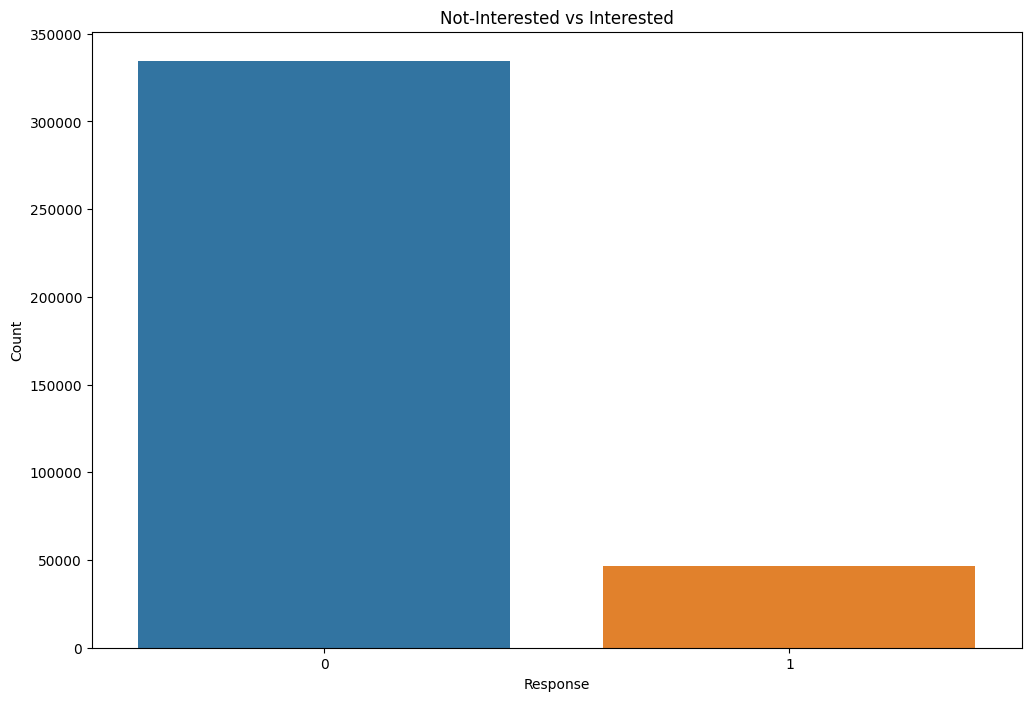

In [ ]:

sns.countplot(x='Response', data=df, palette=['#1f77b4', '#ff7f0e'])  # Custom colors
plt.title('Not-Interested vs Interested')  # Title for the countplot
plt.xlabel('Response')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.show()



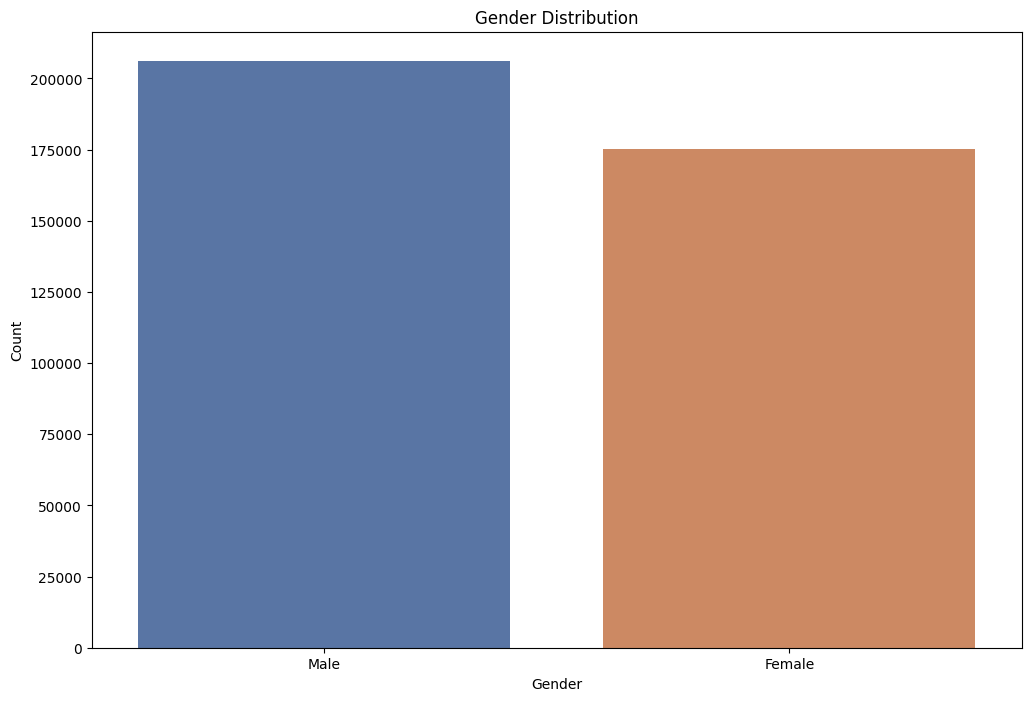

In [ ]:
# Visualization code with color palette
sns.countplot(x='Gender', data=df, palette=['#4c72b0', '#dd8452'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


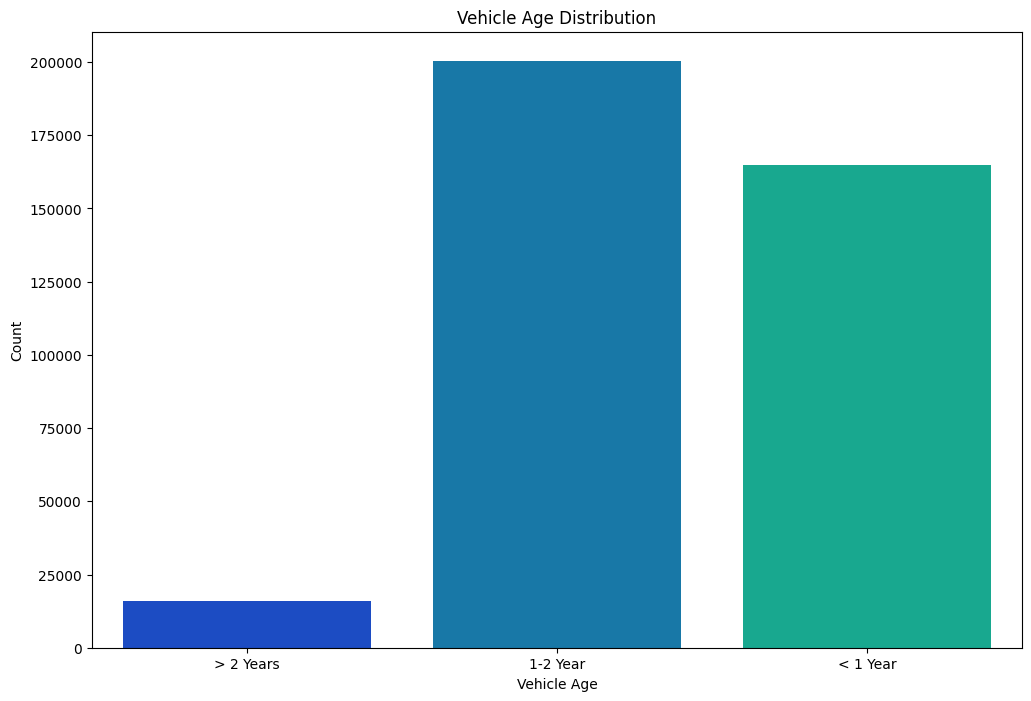

In [ ]:
sns.countplot(x='Vehicle_Age', data=df, palette='winter')
plt.title('Vehicle Age Distribution')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()



1 .Used countplot to analyze gender and vehicle age in our dataset.

2. The number of male customers is higher than female, and vehicles aged 1-2 years outnumber those under 1 year.

3. No insights suggest negative growth.

4. The gender ratio is nearly equal, with males slightly exceeding females.

#### Chart - 2

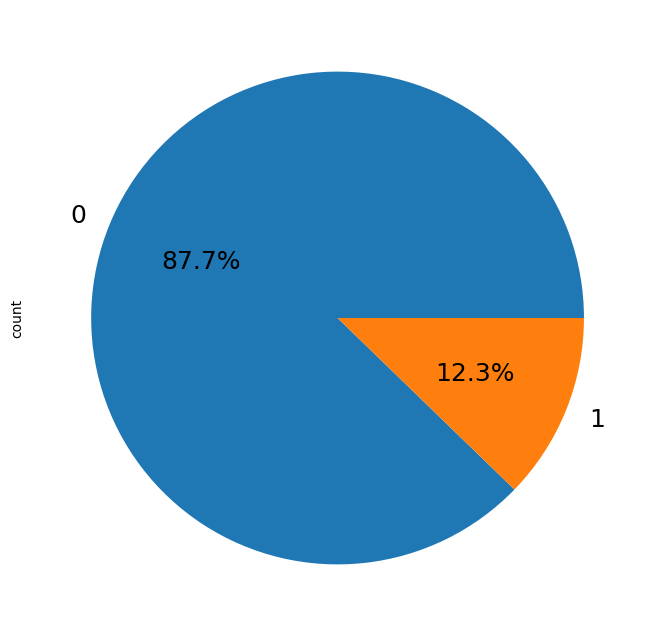

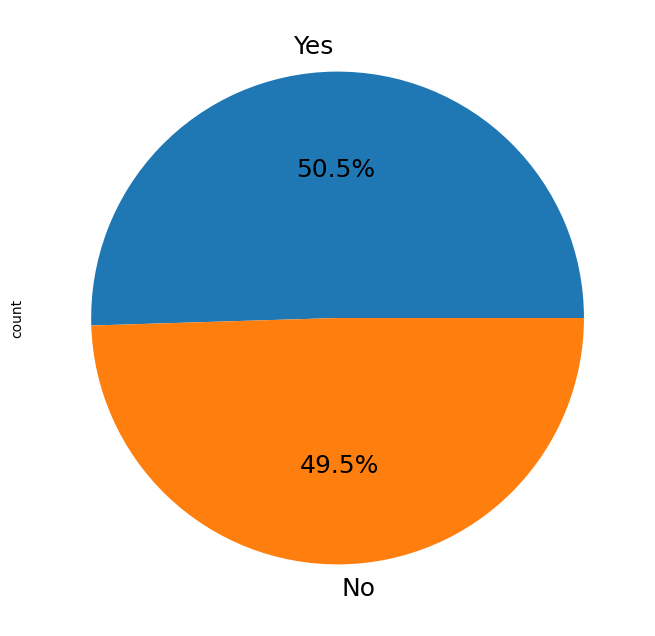

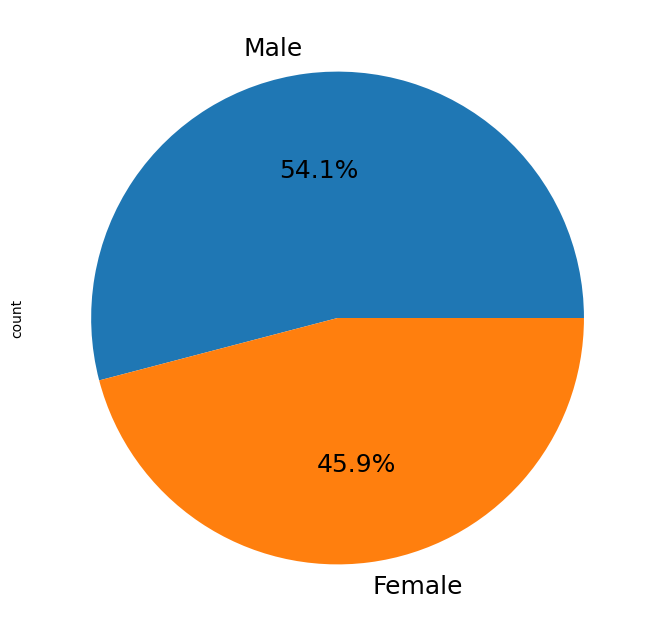

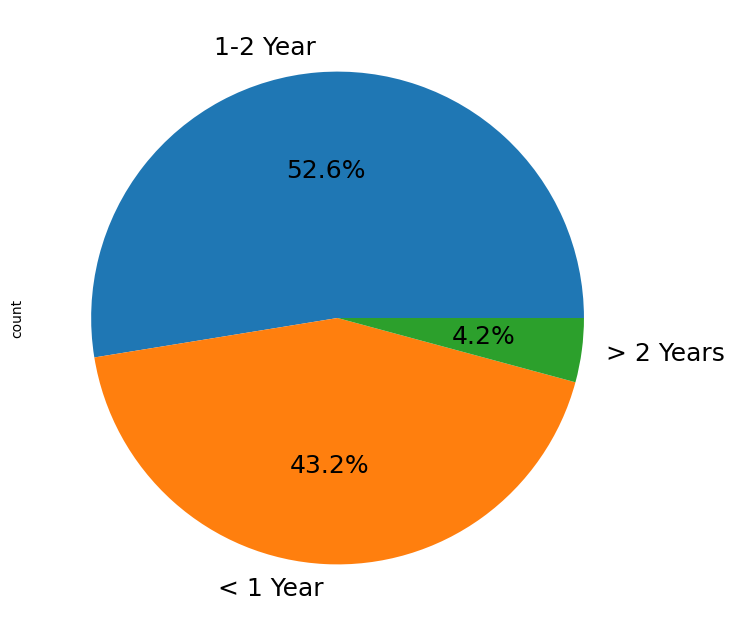

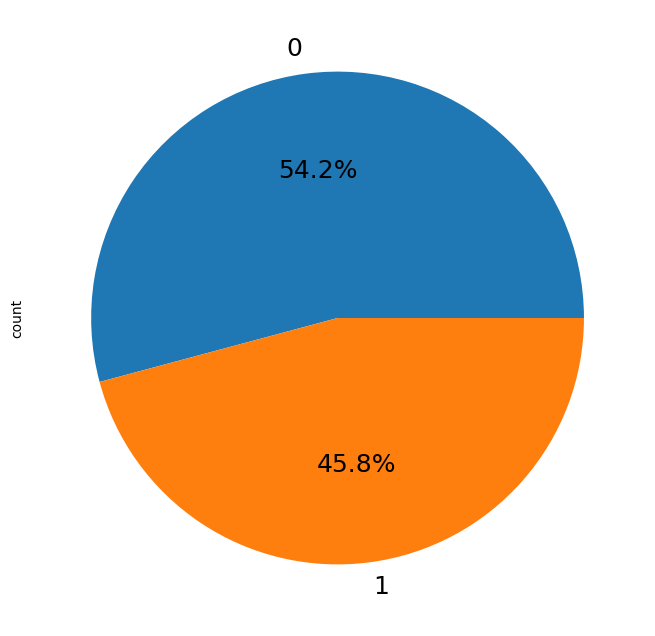

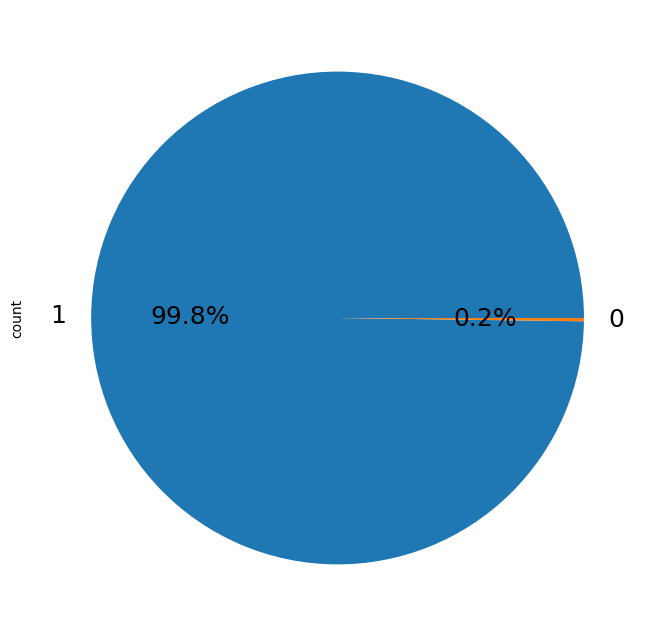

In [ ]:
# Chart - 2 visualization code
# percentage of features
df_box = df[['Response', 'Vehicle_Damage', 'Gender','Vehicle_Age','Previously_Insured','Driving_License']]

for column in df_box :
    percent = df[column].value_counts()
    percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 15})
    plt.show()

1. Gender Distribution: 54.1% male and 45.9% female.
2. Age: Most customers are young.
3. Driving License: 99.8% have a driving license.
4. Previous Insurance: 45.8% are previously insured.
5. Vehicle Age: 52.6% have vehicles 1-2 years old.
6. Car Damage: Nearly equal numbers of customers with and without car damage.
7. Insurance Interest: 87.7% are not interested in purchasing vehicle insurance.


In the 'Response' feature, 0 accounts for 87.7% and 1 for only 12.3%. The dataset is imbalanced and needs balancing.

#### Chart - 3

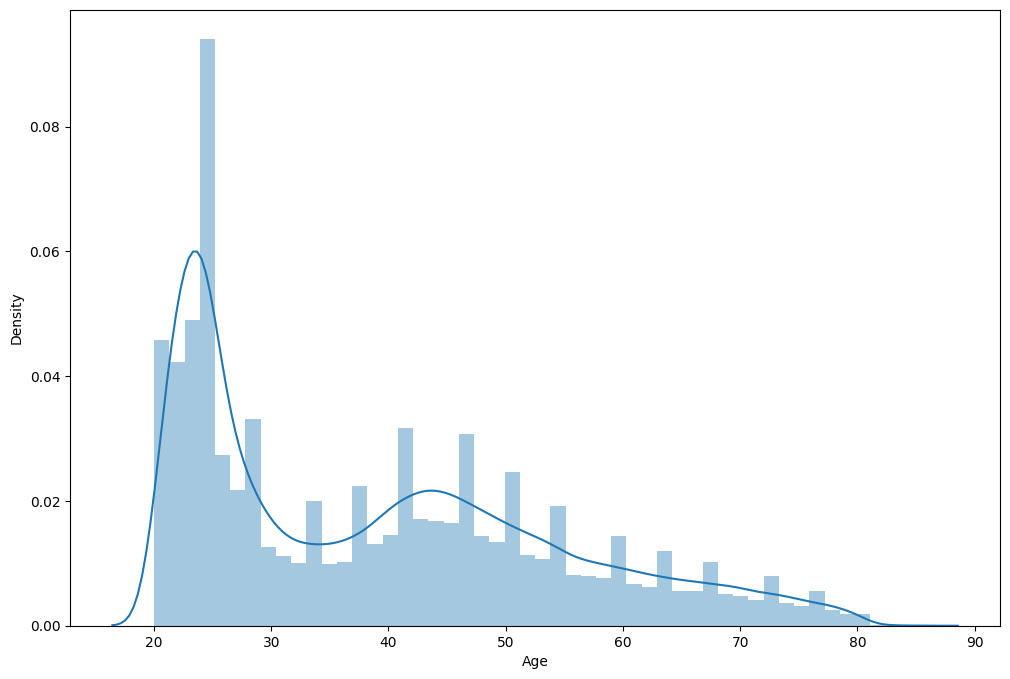

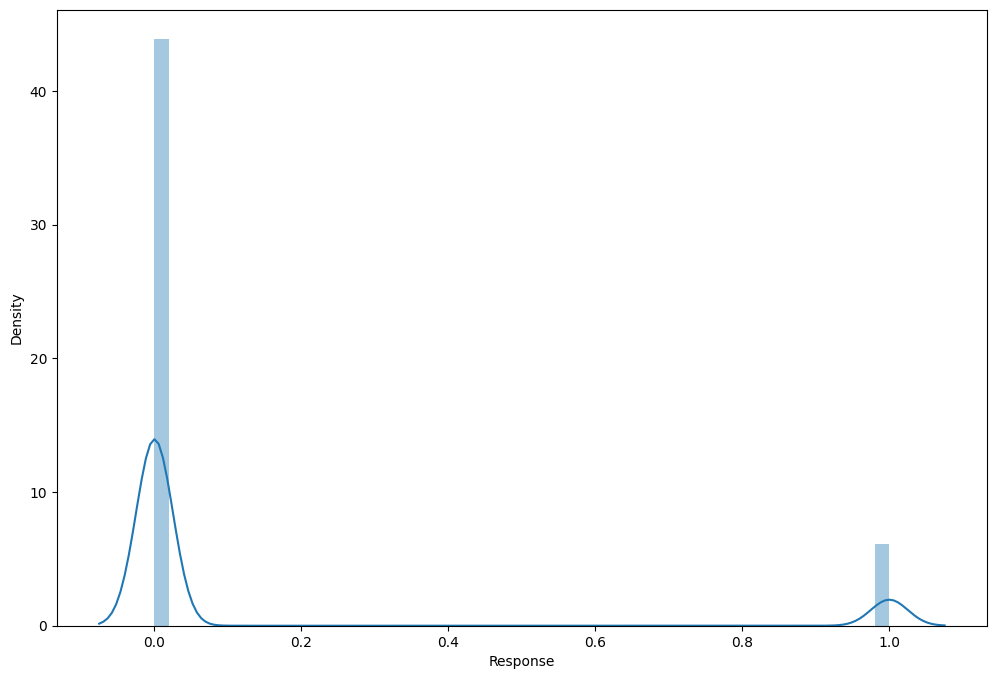

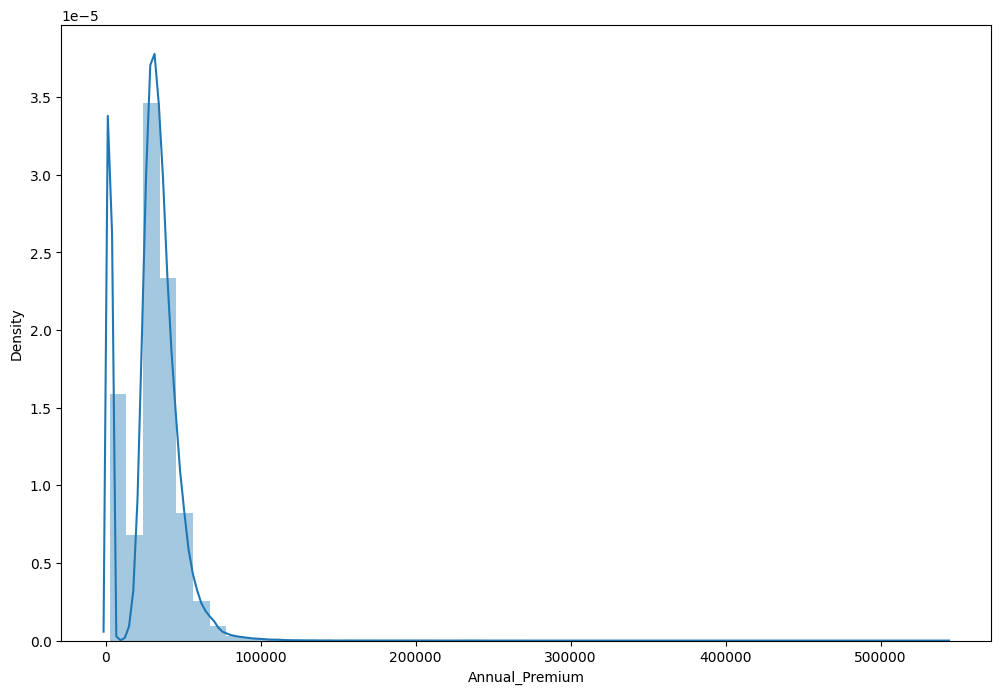

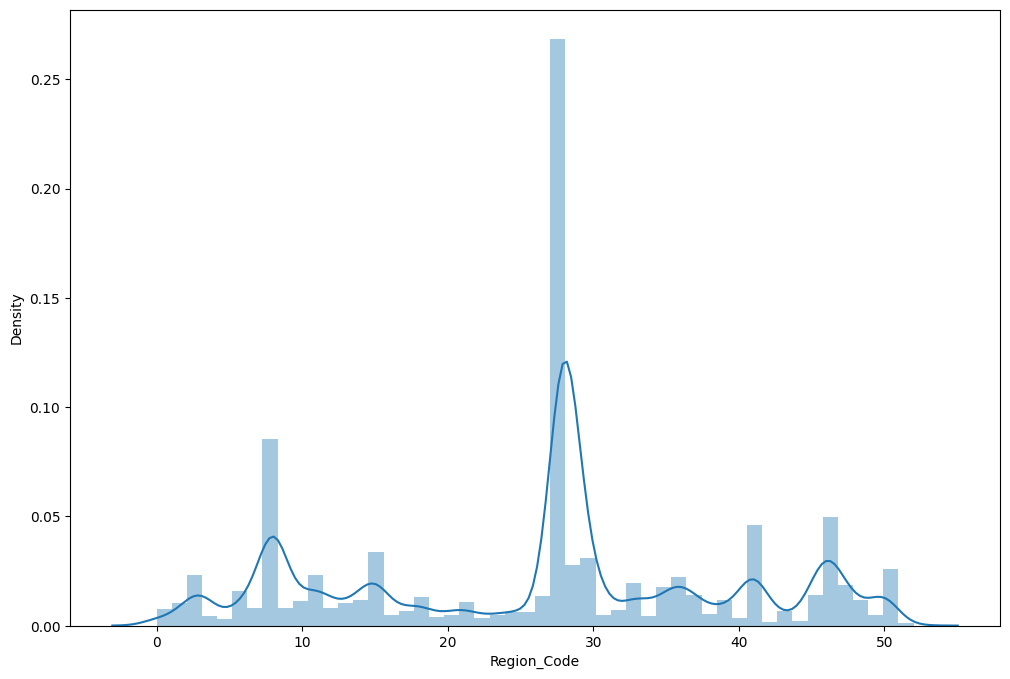

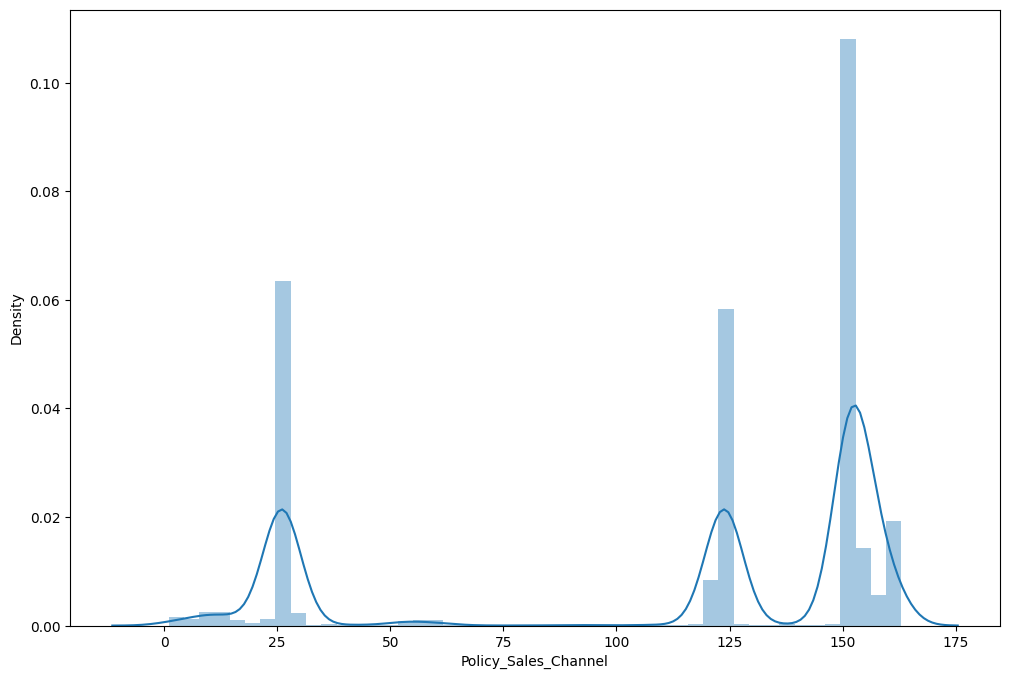

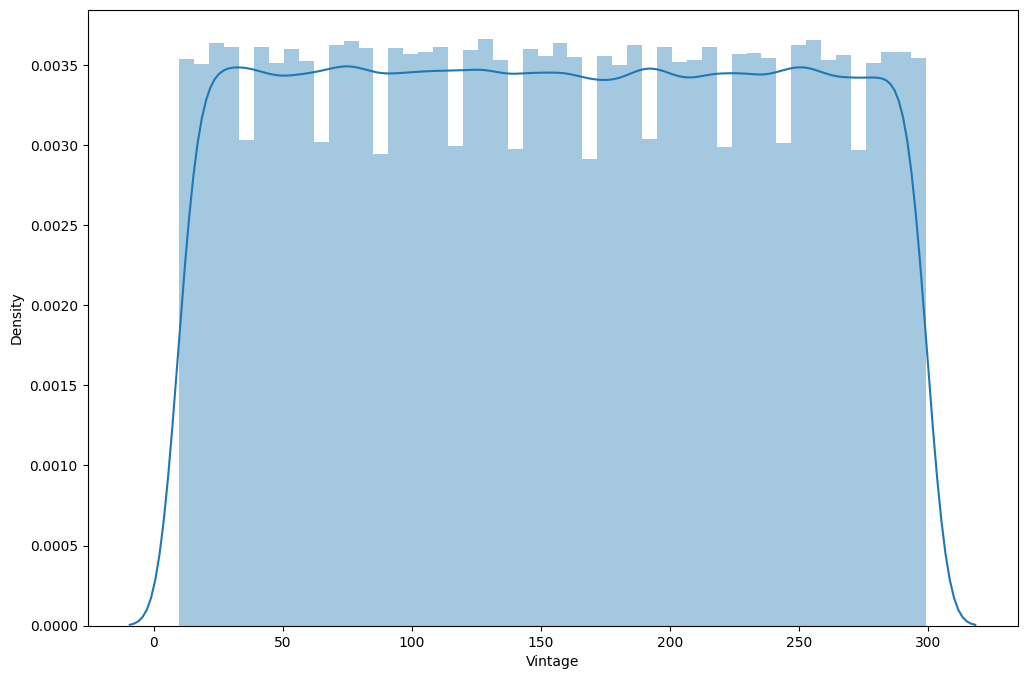

In [ ]:
# Chart - 3 visualization code
# Displot of datasets
sns.distplot(df['Age']);
plt.show()
sns.distplot(df['Response']);
plt.show()
sns.distplot(df['Annual_Premium']);
plt.show()
sns.distplot(df['Region_Code']);
plt.show()
sns.distplot(df['Policy_Sales_Channel']);
plt.show()
sns.distplot(df['Vintage']);
plt.show()


Used displot to show the distribution of our features. It's helpful for illustrating data distribution, especially with large datasets, and for detecting outliers or gaps.

From the plot:

1. Annual Premium: Positively skewed distribution.
2. Vintage: Approximately uniform distribution.
3. Age: Positively skewed distribution.


We need to adjust the distribution of Annual_Premium to prevent overfitting.

#### Chart - 4

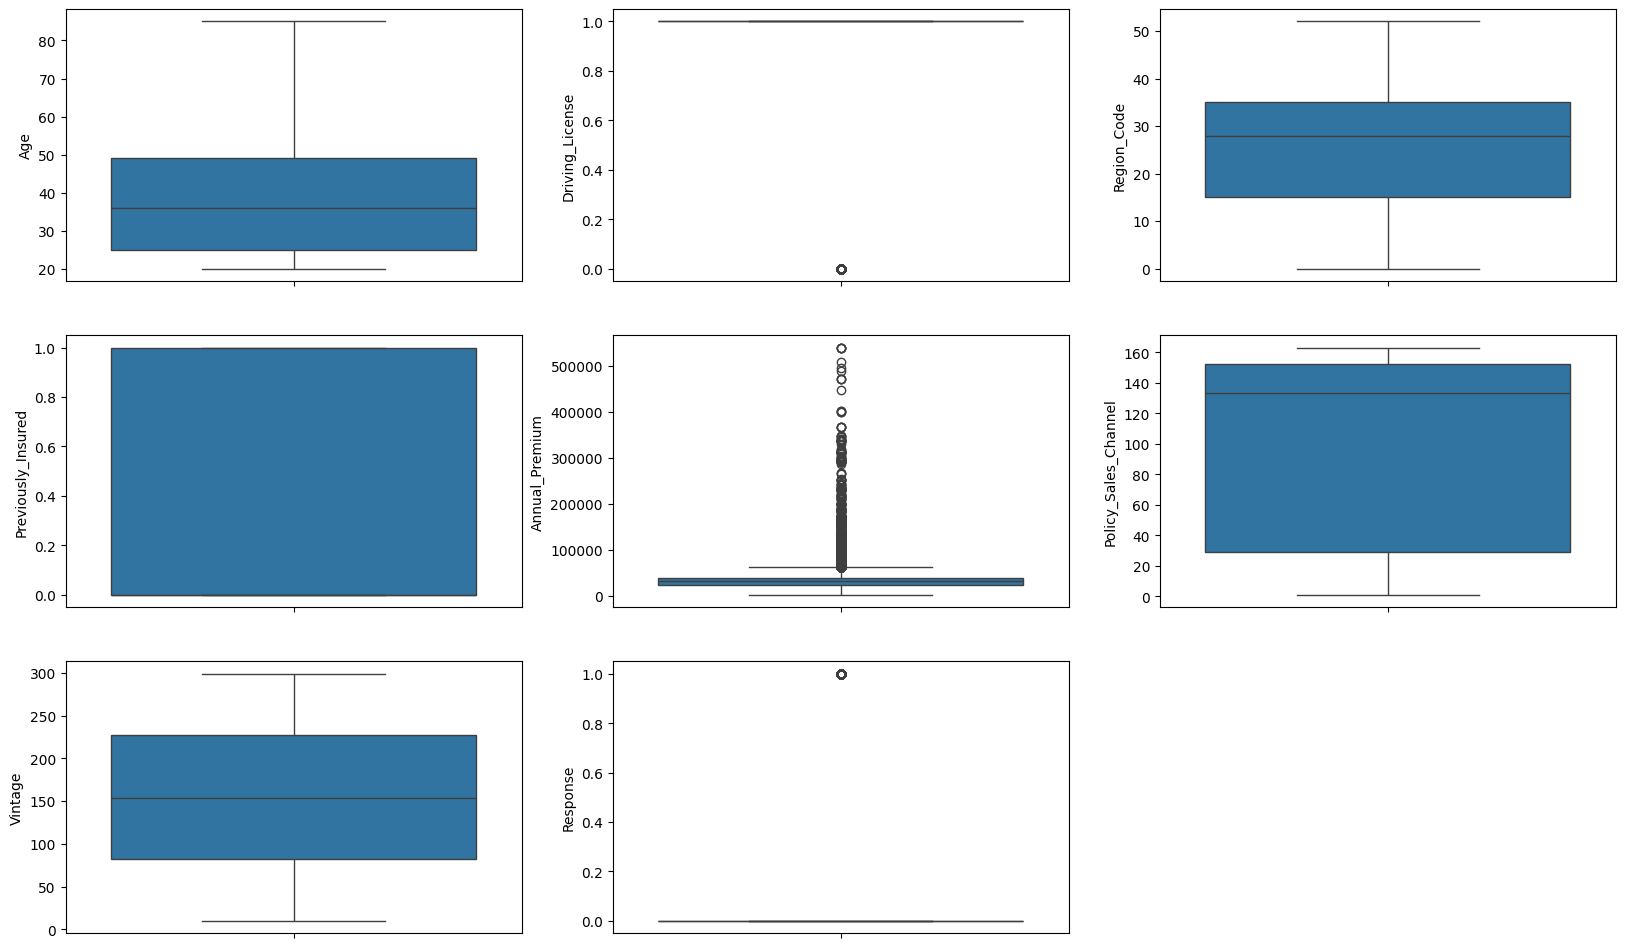

In [ ]:
# Chart - 4 visualization code
# checking outliers by using boxplot and droping object features
df_box = df.drop(columns = ['id', 'Vehicle_Damage', 'Gender','Vehicle_Age'])

plt.figure(figsize = (20, 12))
n = 1
for column in df_box :
    plt.subplot(3,3,n)
    sns.boxplot(df[column])
    n += 1

Used boxplot() to detect outliers in our data. This plot illustrates the distribution's quartile values and extreme values. The "whiskers" reach out to data points within 1.5 IQRs from the lower and upper quartiles, while points outside this range are shown individually. Each data point in the boxplot represents an actual observation from the dataset.

There are many outliers in the Annual_Premium column.

#### Chart - 5


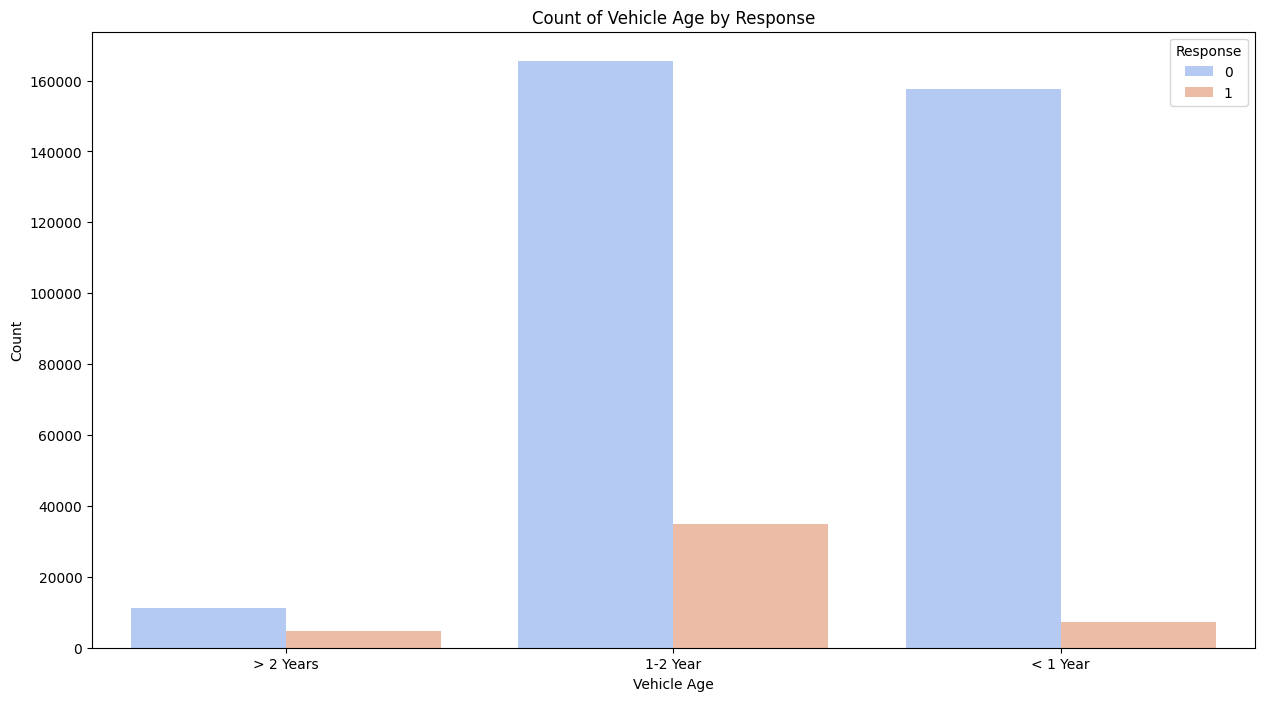

In [ ]:
# Chart - 5 visualization code

# Plot with hu
plt.figure(figsize=(15, 8))
sns.countplot(x='Vehicle_Age', hue='Response', data=df, palette='coolwarm')
plt.title('Count of Vehicle Age by Response')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()


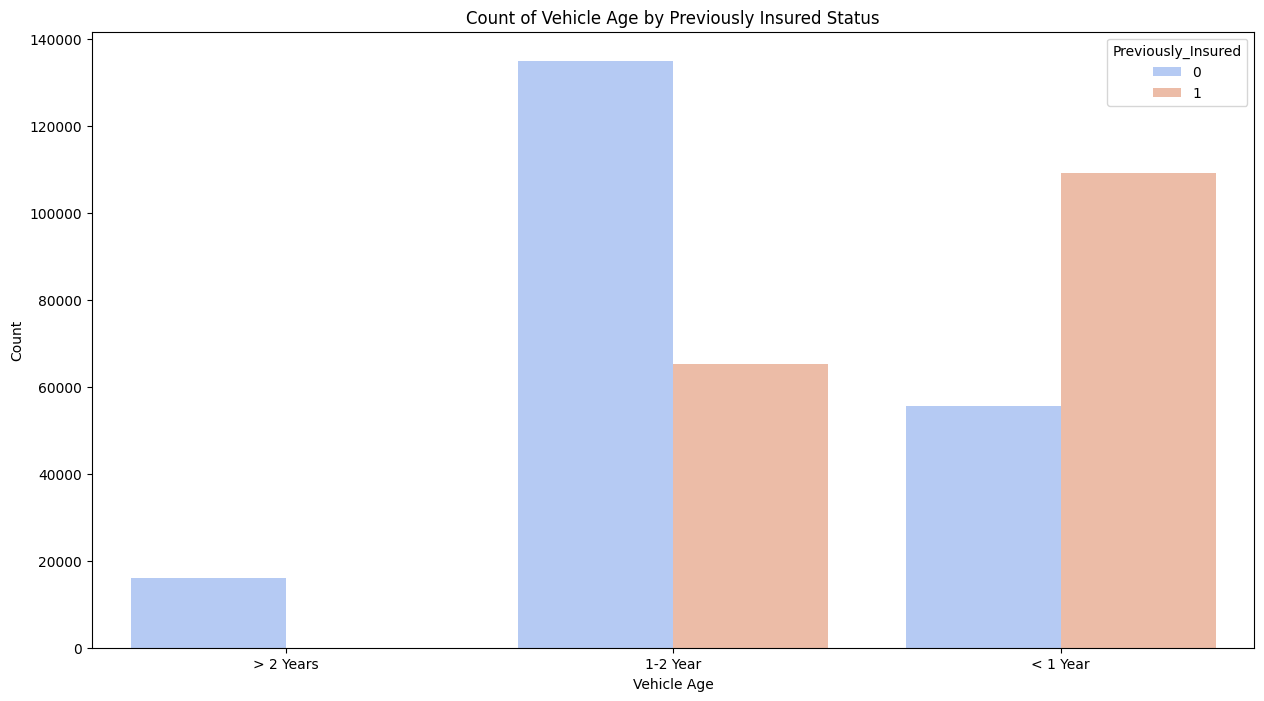

In [ ]:

# Plot the count of 'Vehicle_Age' with hue for 'Previously_Insured'
plt.figure(figsize=(15, 8))
sns.countplot(x='Vehicle_Age', hue='Previously_Insured', data=df, palette='coolwarm')
plt.title('Count of Vehicle Age by Previously Insured Status')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()


Vehicles aged less than 1 year have a higher proportion of previously insured customers.
Vehicles aged 1-2 years show a higher rate of positive responses.

From the above plot, we can say that vehicle owners with vehicles aged 1 to 2 years are more likely to buy insurance.

#### Chart - 6

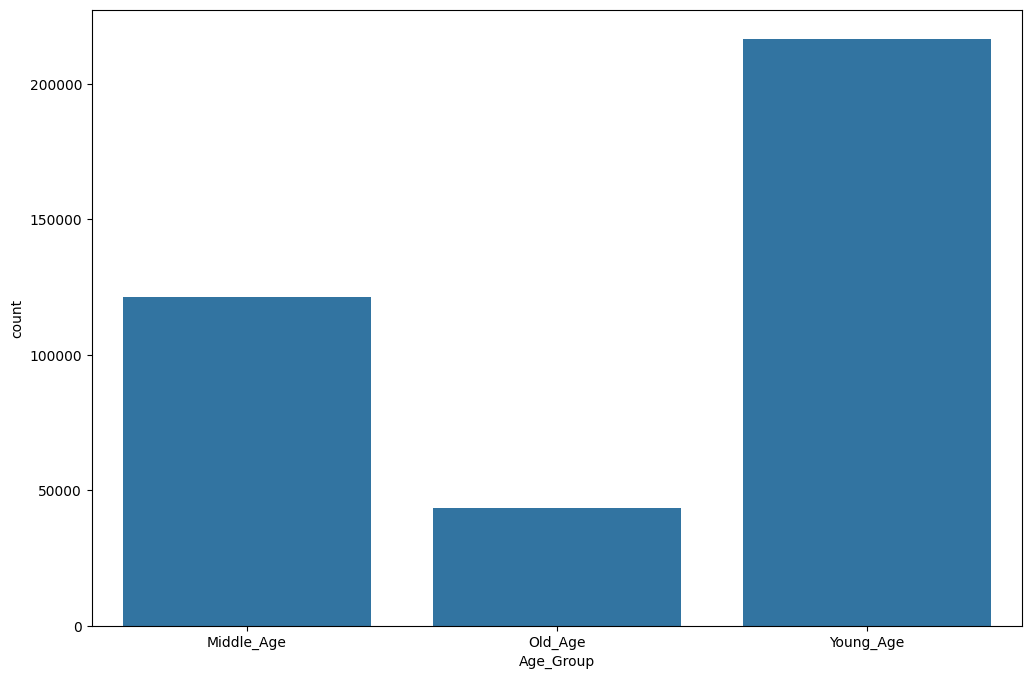

In [ ]:
# Chart - 6 visualization code
sns.countplot(x = df1['Age_Group'],data = df1)
plt.show()

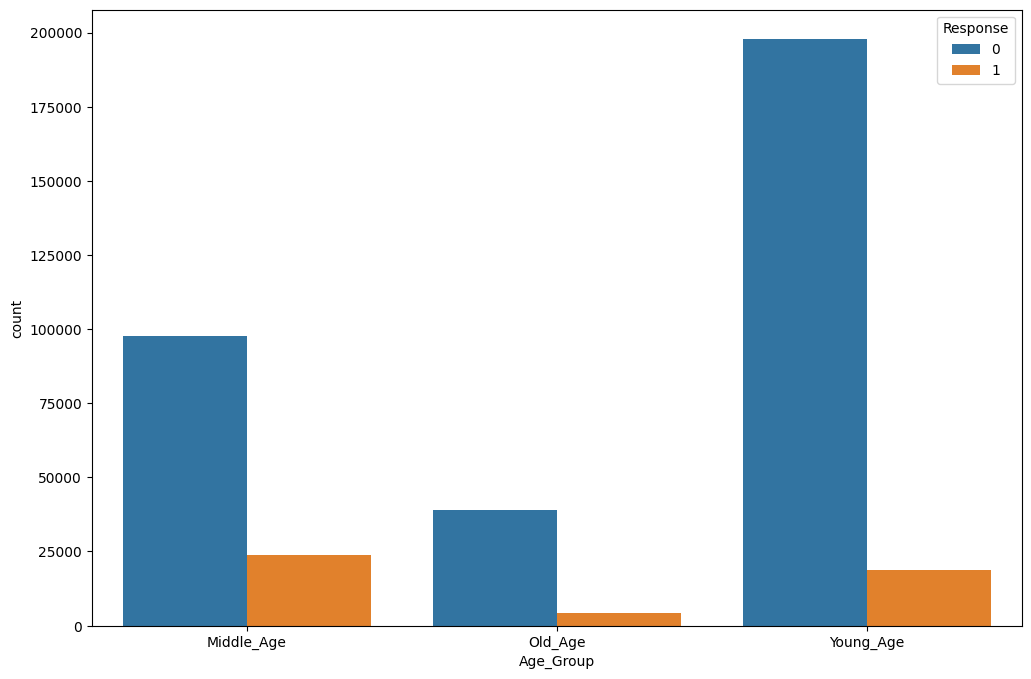

In [ ]:
# Chart - 6 visualization code
sns.countplot(x = 'Age_Group', data = df1, hue='Response')
plt.show()

From the above graph, we can see that customers in the Middle_Age group have the highest number of insurance purchases, while the Young_Age group shows less interest in buying vehicle insurance.

#### Chart - 7

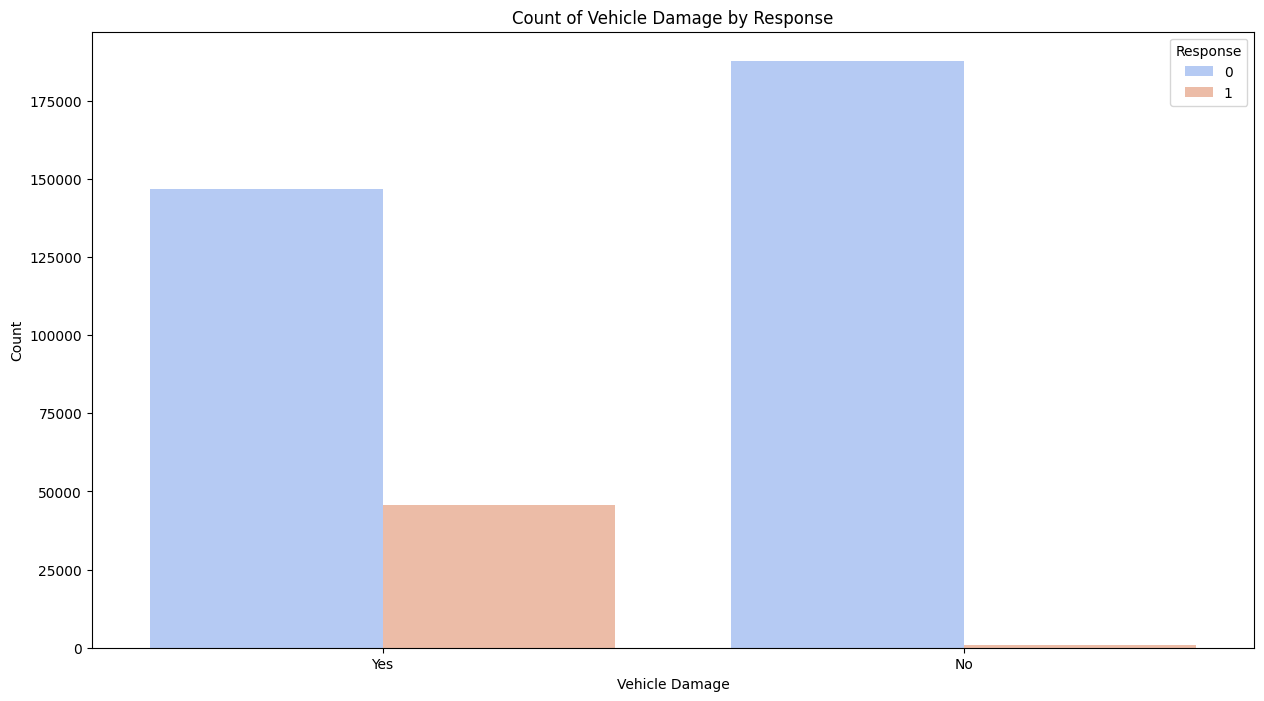

In [ ]:
# Chart - 7 visualization code
# Plot the count of 'Vehicle_Damage' with hue for 'Response'
plt.figure(figsize=(15, 8))
sns.countplot(x='Vehicle_Damage', hue='Response', data=df, palette='coolwarm')
plt.title('Count of Vehicle Damage by Response')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()


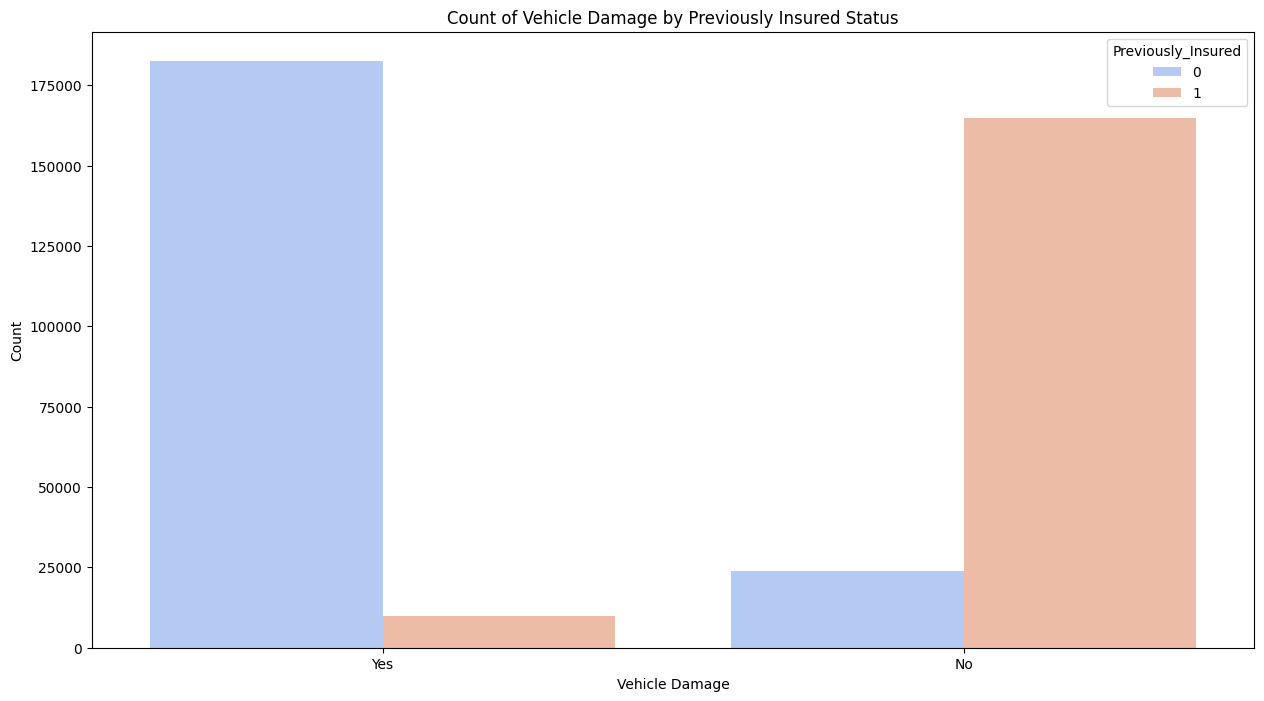

In [ ]:


# Plot the count of 'Vehicle_Damage' with hue for 'Previously_Insured'
plt.figure(figsize=(15, 8))
sns.countplot(x='Vehicle_Damage', hue='Previously_Insured', data=df, palette='coolwarm')
plt.title('Count of Vehicle Damage by Previously Insured Status')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()


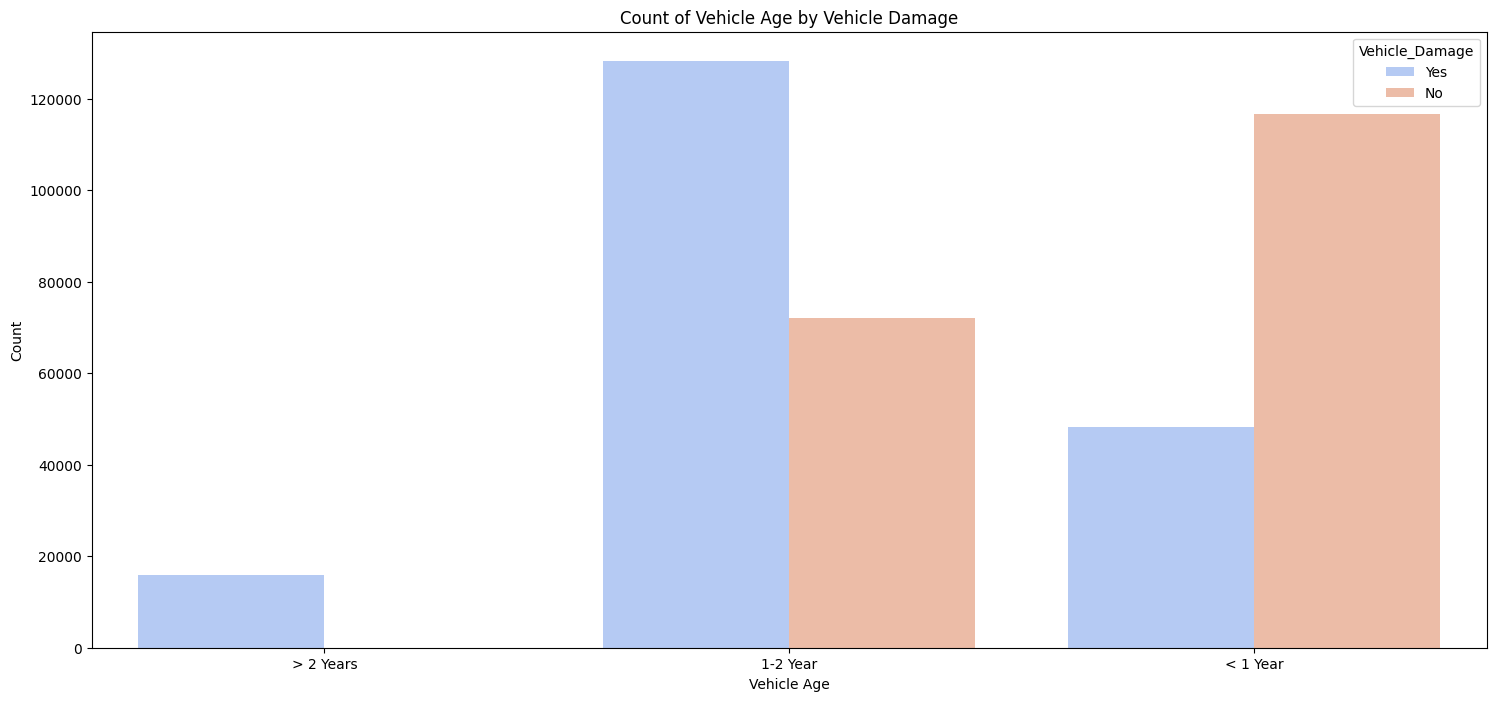

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of 'Vehicle_Age' with hue for 'Vehicle_Damage'
plt.figure(figsize=(18, 8))
sns.countplot(x='Vehicle_Age', hue='Vehicle_Damage', data=df, palette='coolwarm')
plt.title('Count of Vehicle Age by Vehicle Damage')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()


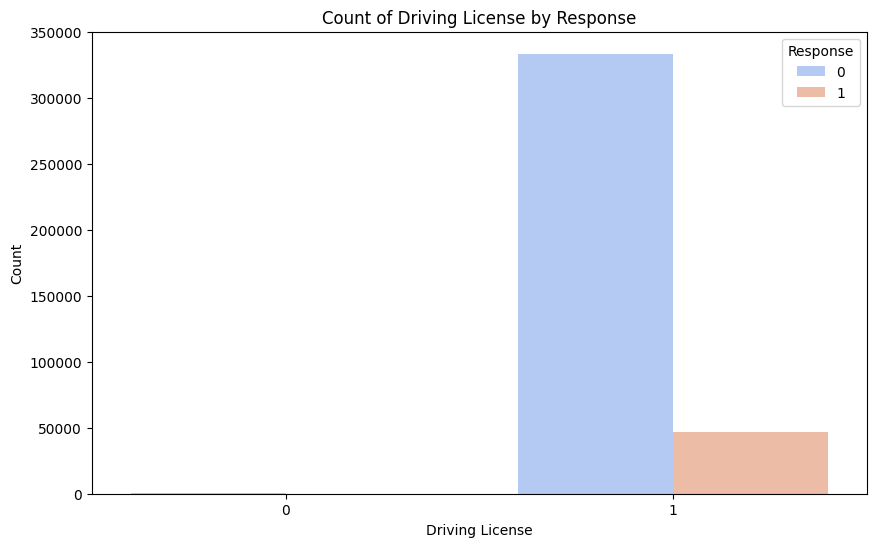

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of 'Driving_License' with hue for 'Response'
plt.figure(figsize=(10, 6))
sns.countplot(x='Driving_License', hue='Response', data=df, palette='coolwarm')
plt.title('Count of Driving License by Response')
plt.xlabel('Driving License')
plt.ylabel('Count')
plt.show()



Due to their experience with vehicle repair costs, customers with vehicle damage are more likely to purchase insurance. Additionally, customers with vehicles aged between one and two years are more interested in buying insurance compared to those with vehicles less than one year old..

#### Chart - 8

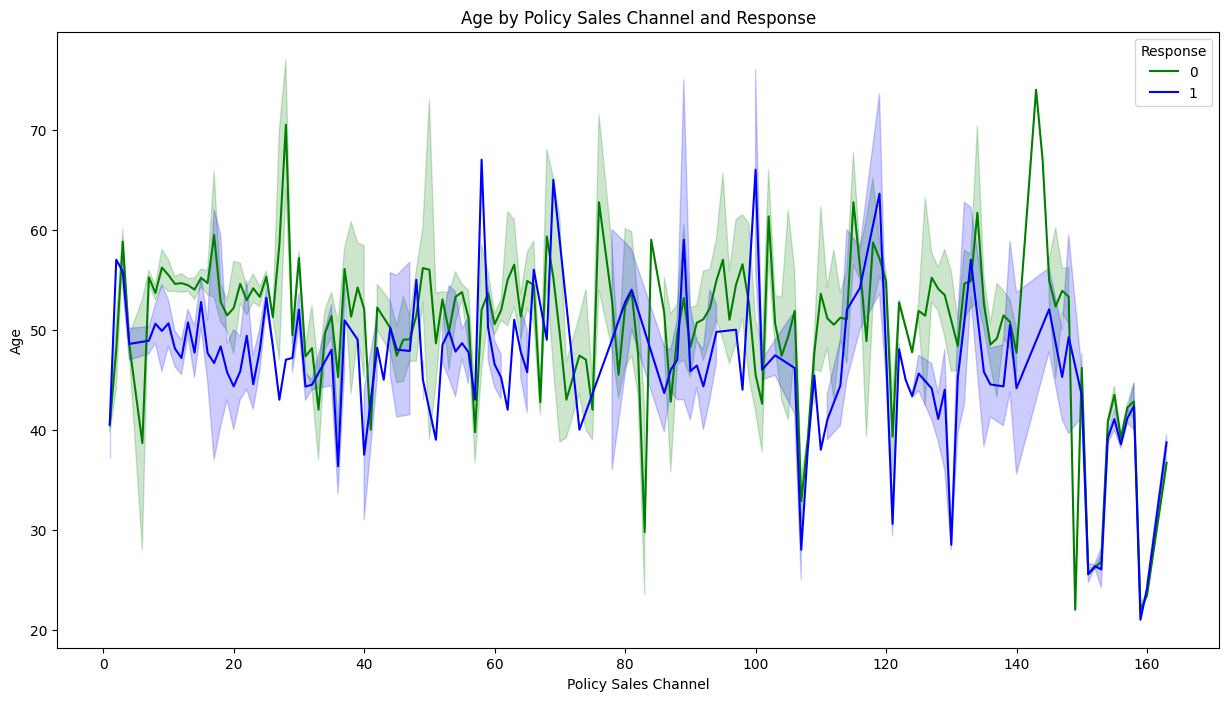

In [ ]:
# Chart - 8 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the line plot of 'Age' vs. 'Policy_Sales_Channel' with hue for 'Response'
plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x='Policy_Sales_Channel', y='Age', hue='Response', palette=['g', 'b'])
plt.title('Age by Policy Sales Channel and Response')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Age')
plt.show()



Region Code 0.28 has the highest number of customers.

#### Chart - 9

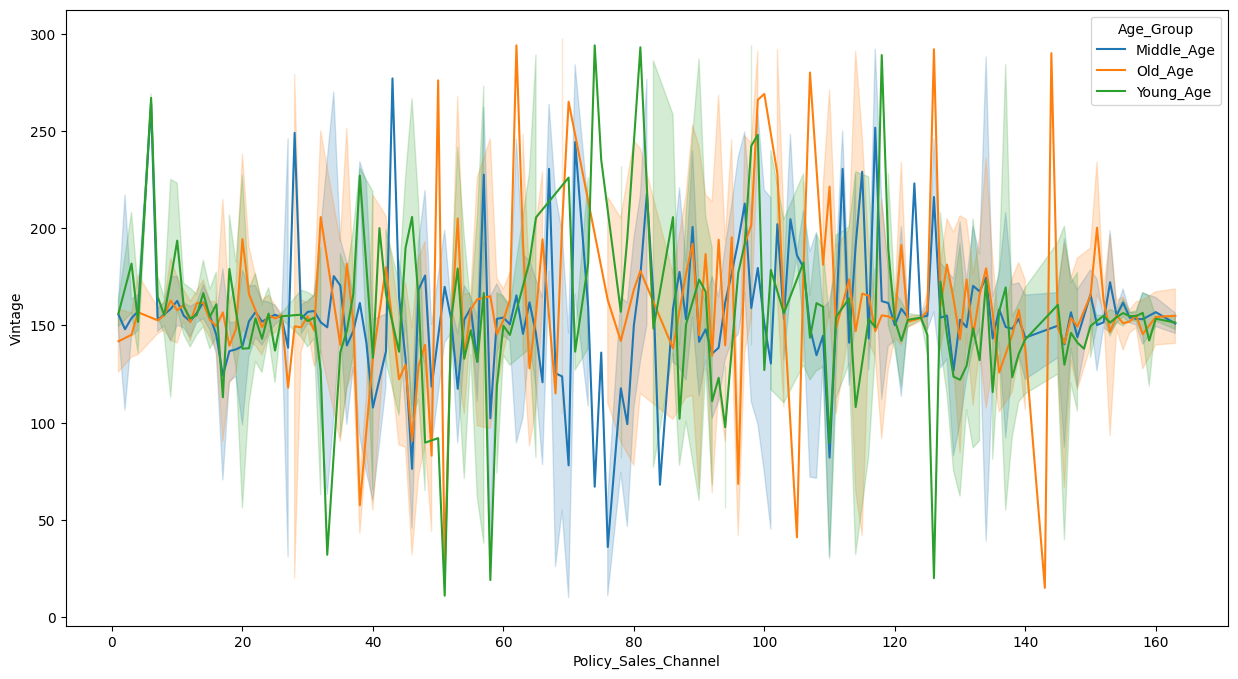

In [ ]:
# Chart - 9 visualization code
# Scaterplots
plt.figure(figsize=(15,8))
sns.lineplot(data=df1,x='Policy_Sales_Channel',y='Vintage',hue ='Age_Group')
plt.show()

The above line plot shows the comparison of age groups across different Vintage and Policy Sales Channel categories.

#### Chart - 10

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

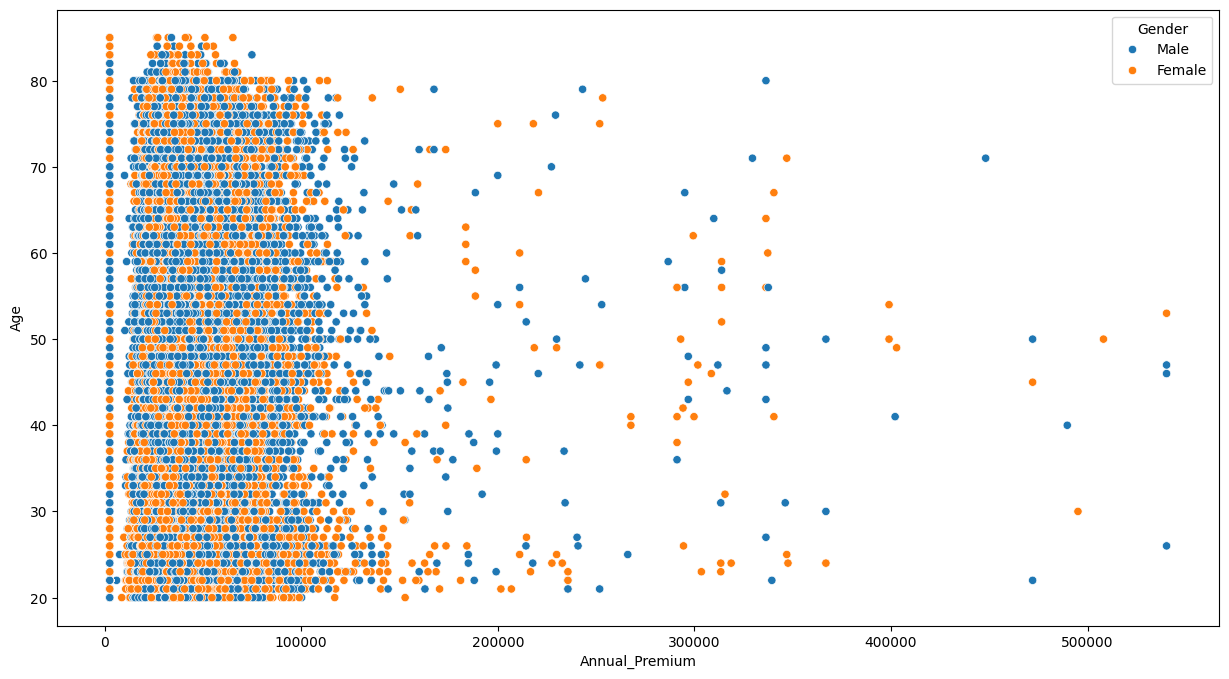

In [ ]:
# Chart - 10 visualization code
# Scaterplots
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Annual_Premium',y='Age',hue='Gender')
plt.show()

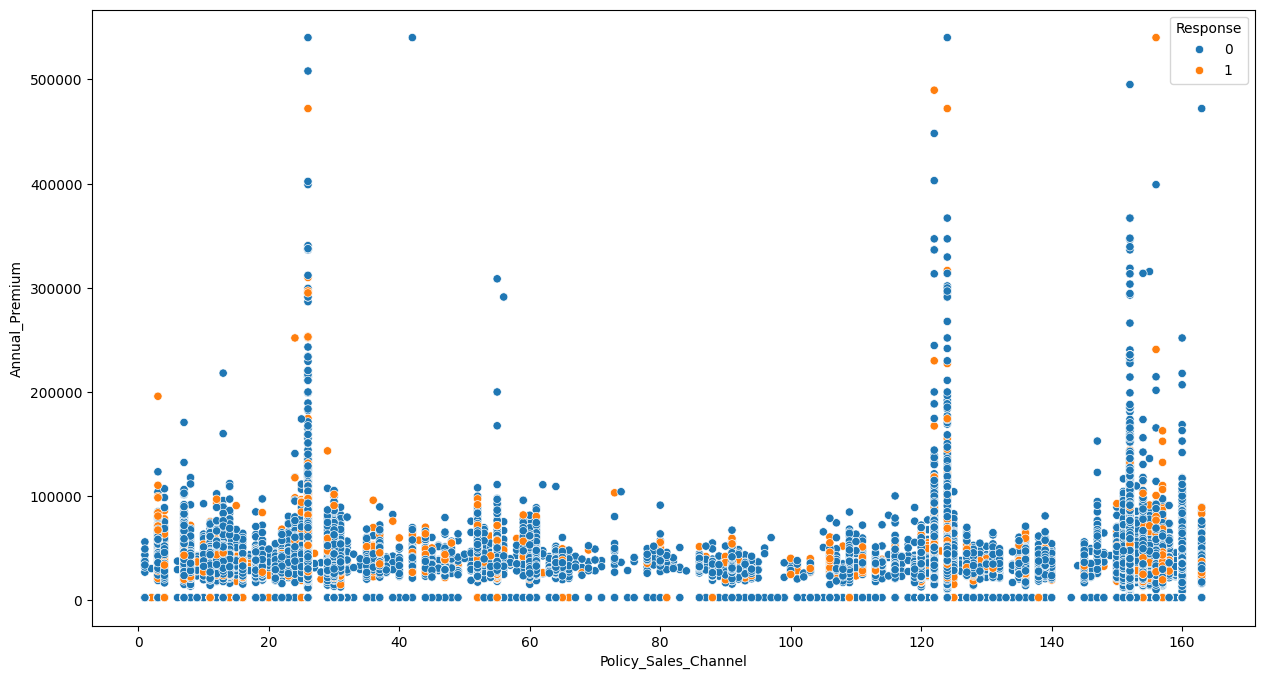

In [ ]:
# Scaterplots
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,y='Annual_Premium',x='Policy_Sales_Channel',hue='Response')
plt.show()

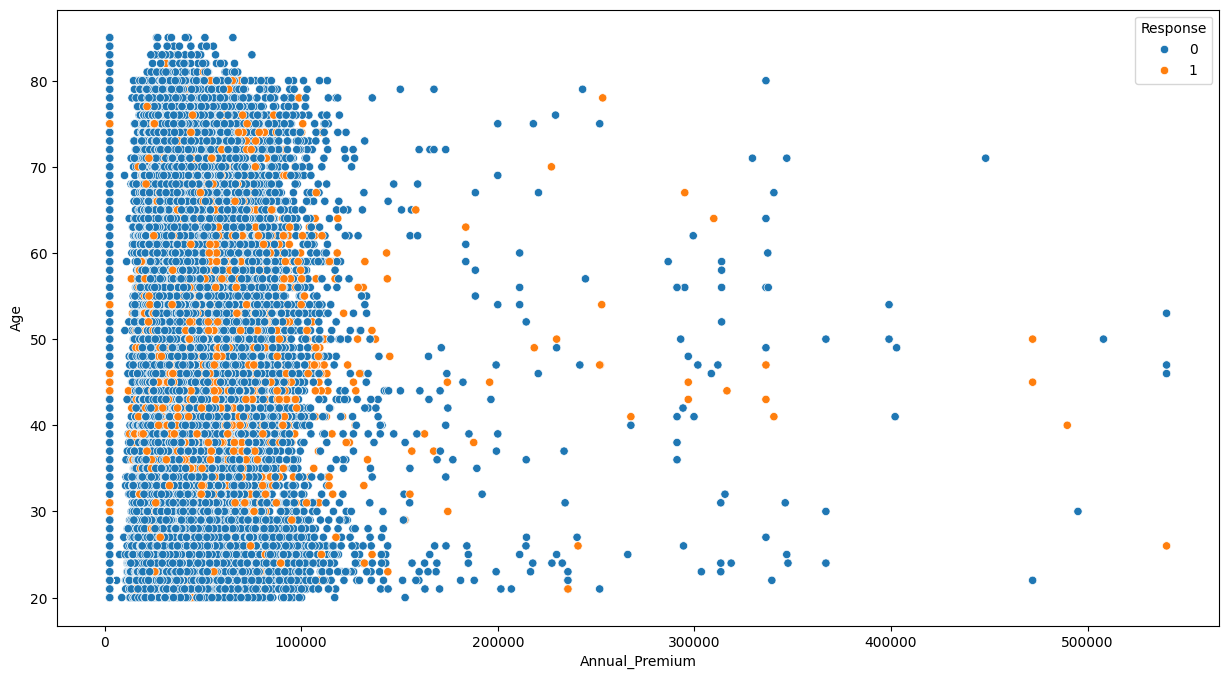

In [ ]:
# Scaterplots
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Annual_Premium',y='Age',hue='Response')
plt.show()


The above plots show:

The Annual Premium based on Age and Gender.
The relationship between Annual Premium and Policy Sales Channel.

#### Chart - 11

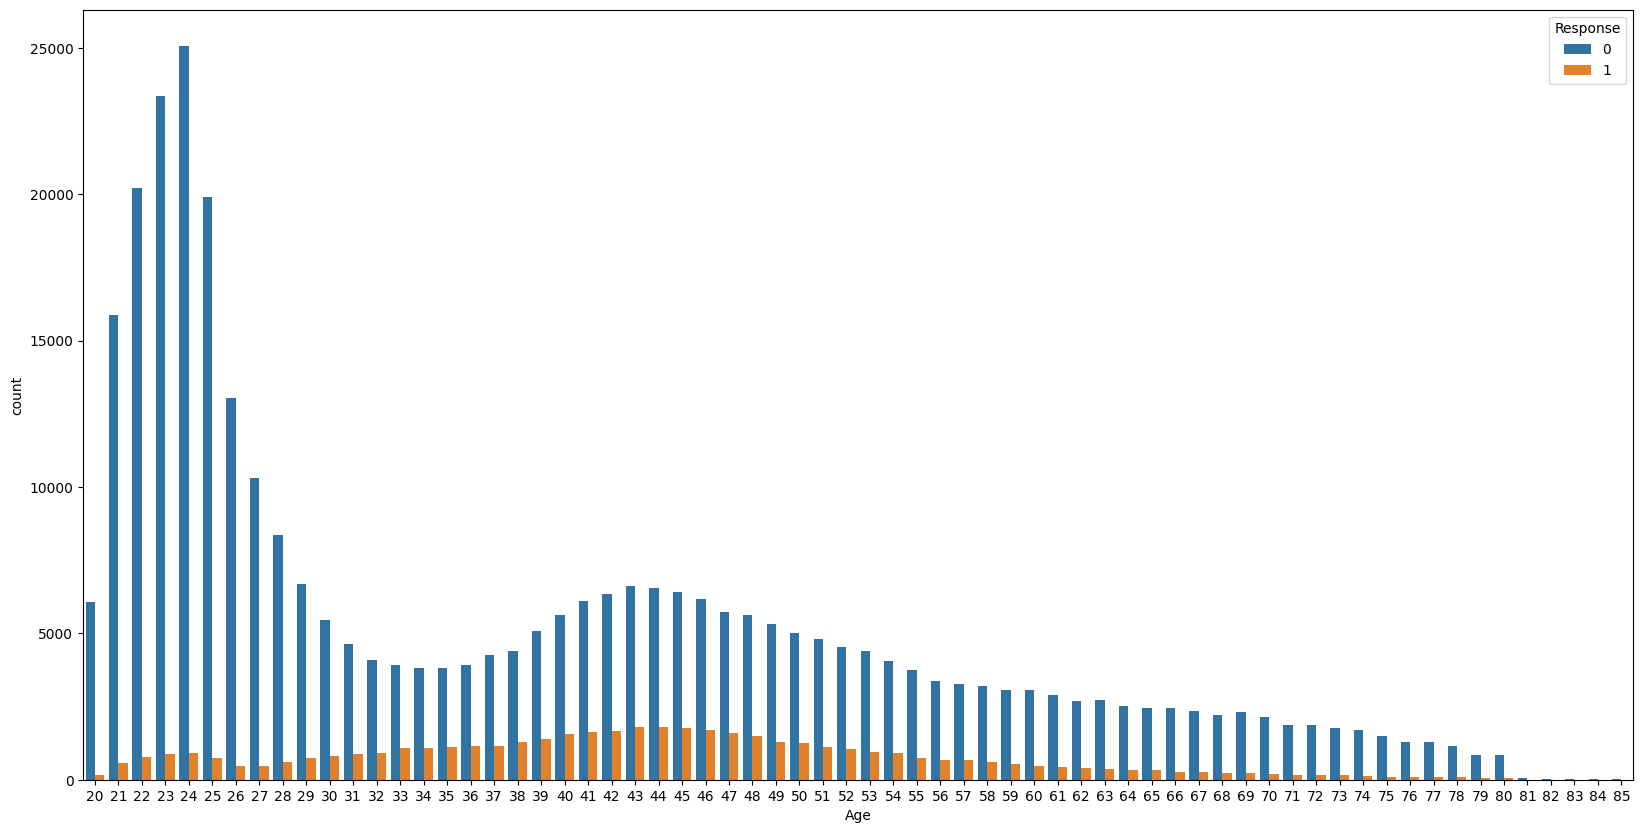

In [ ]:
# Chart - 11 visualization code
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=df)
plt.show()

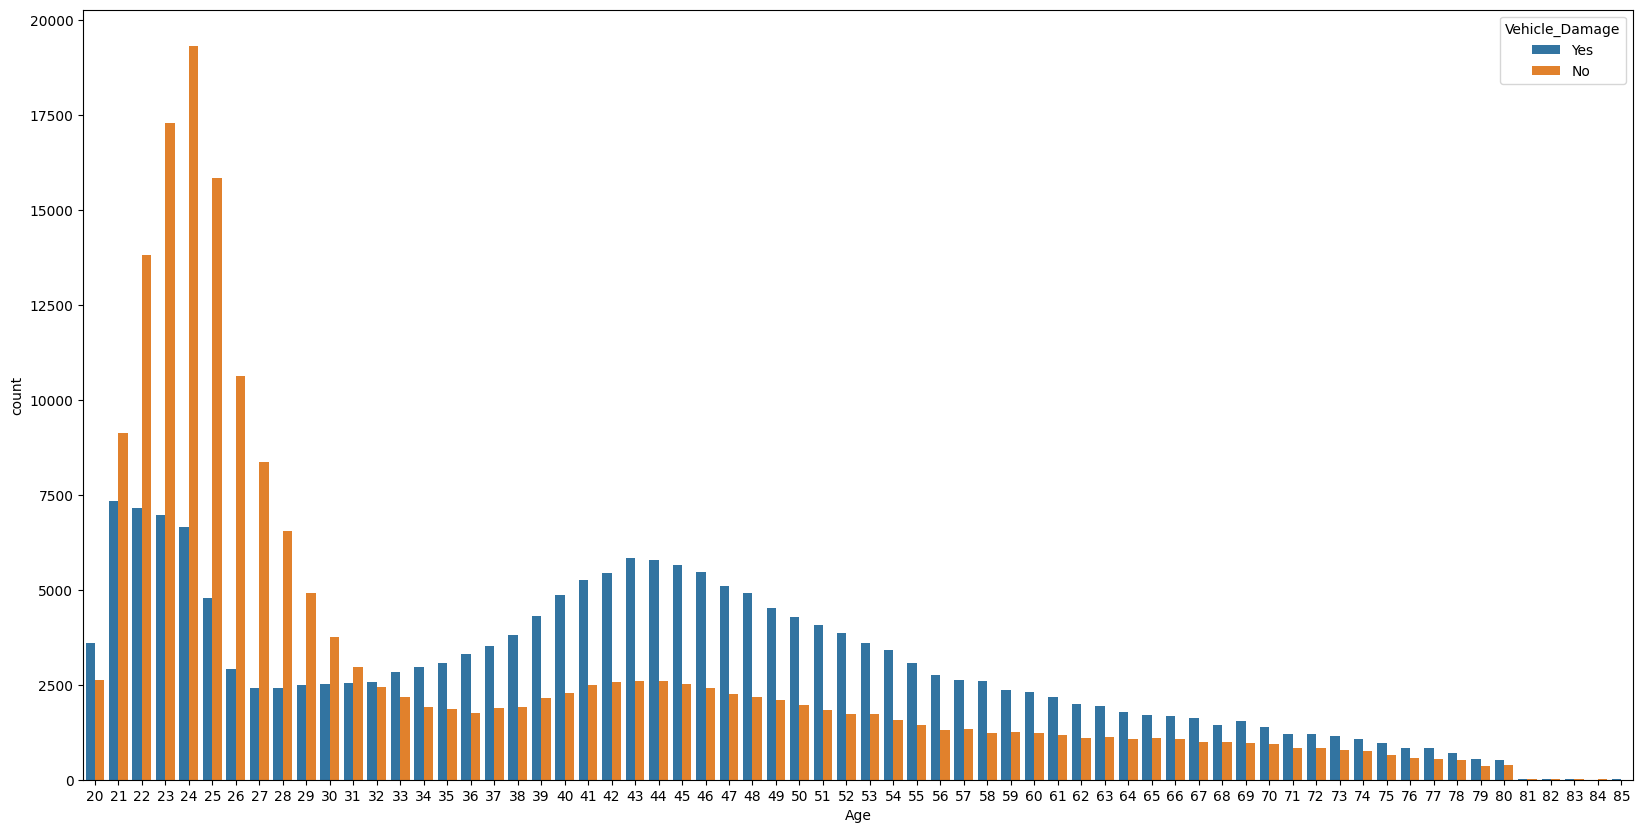

In [ ]:
# visualization code
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Vehicle_Damage',data=df)
plt.show()

1. Customers aged 30 to 60 are more likely to buy insurance. The age group 20 to 30 has a high number of 'Response' 0.
2. In the 20-30 age group, the proportion of damaged versus non-damaged vehicles is lower, while in the 45-80 age group, the proportion of damaged vehicles exceeds that of non-damaged ones.

#### Chart - 12

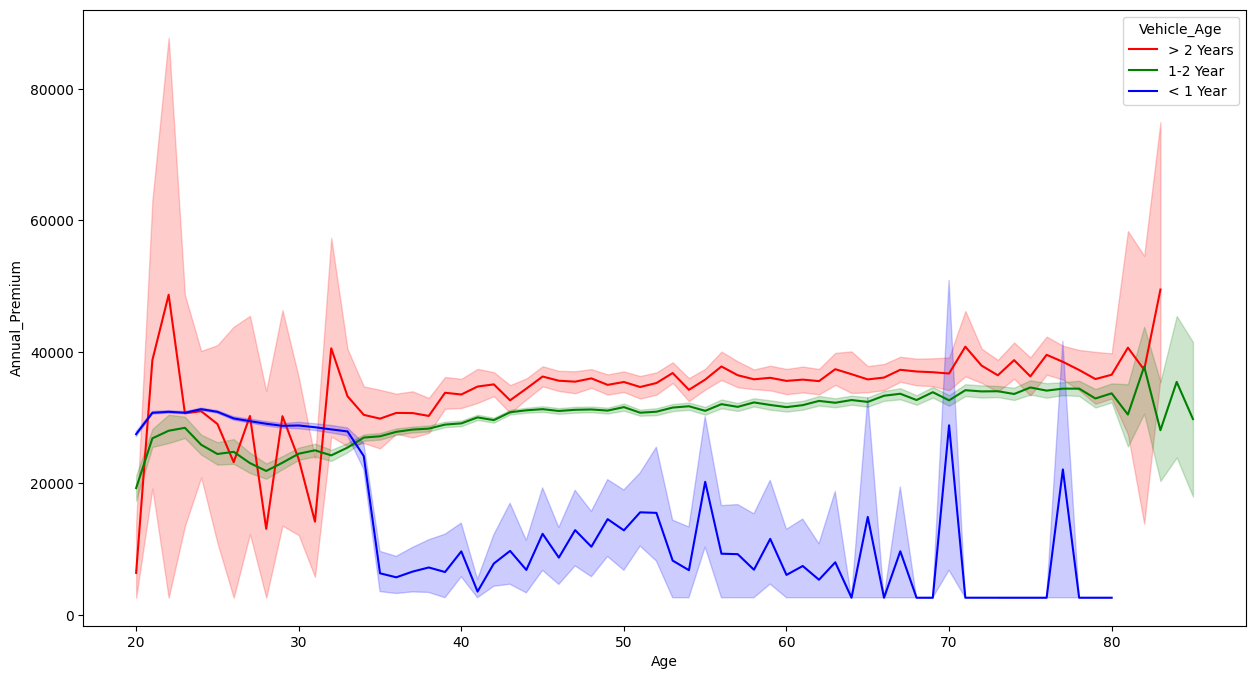

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x ='Age', y='Annual_Premium', hue='Vehicle_Age', palette=['r', 'g', 'b'])
plt.show()

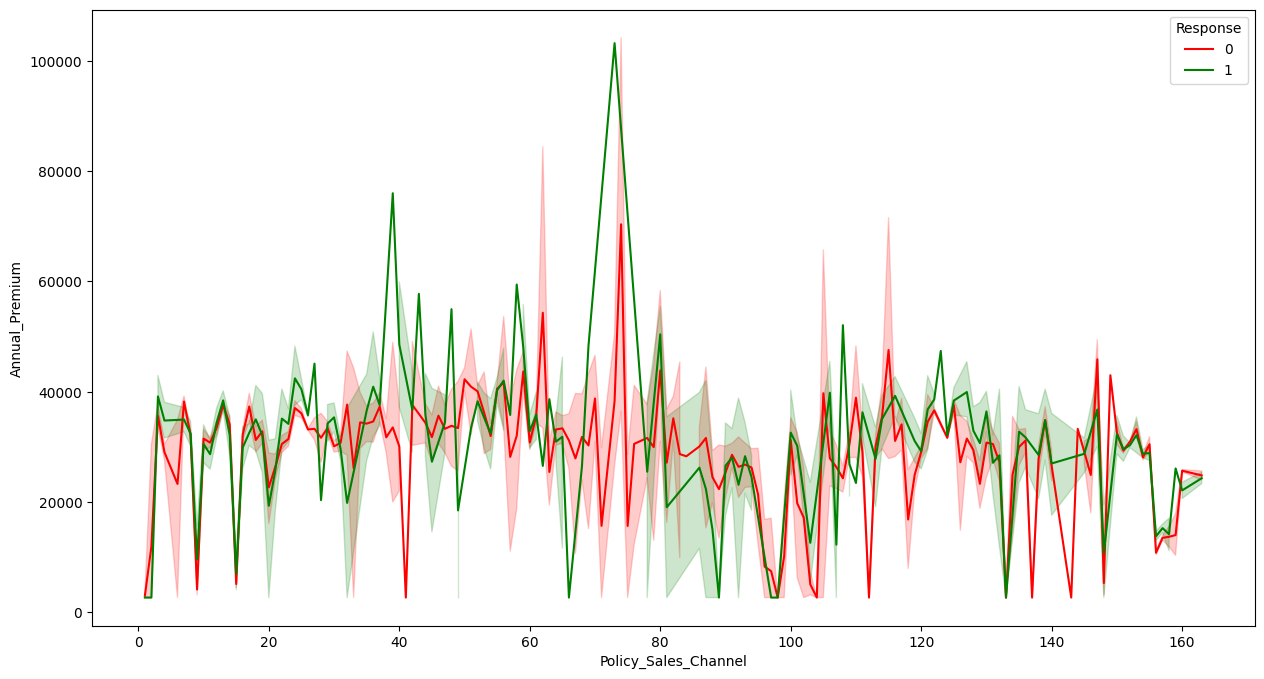

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x ='Policy_Sales_Channel', y='Annual_Premium', hue='Response', palette=['r', 'g'])
plt.show()


From the plot, we can say that:

1. The likelihood of purchasing vehicle insurance is higher if the vehicle is damaged, regardless of the VehicleAge group.
2. As vehicle age increases, the likelihood of buying vehicle insurance also increases.
3. Annual Premiums are comparatively higher for customers with damaged vehicles.

#### Chart - 13

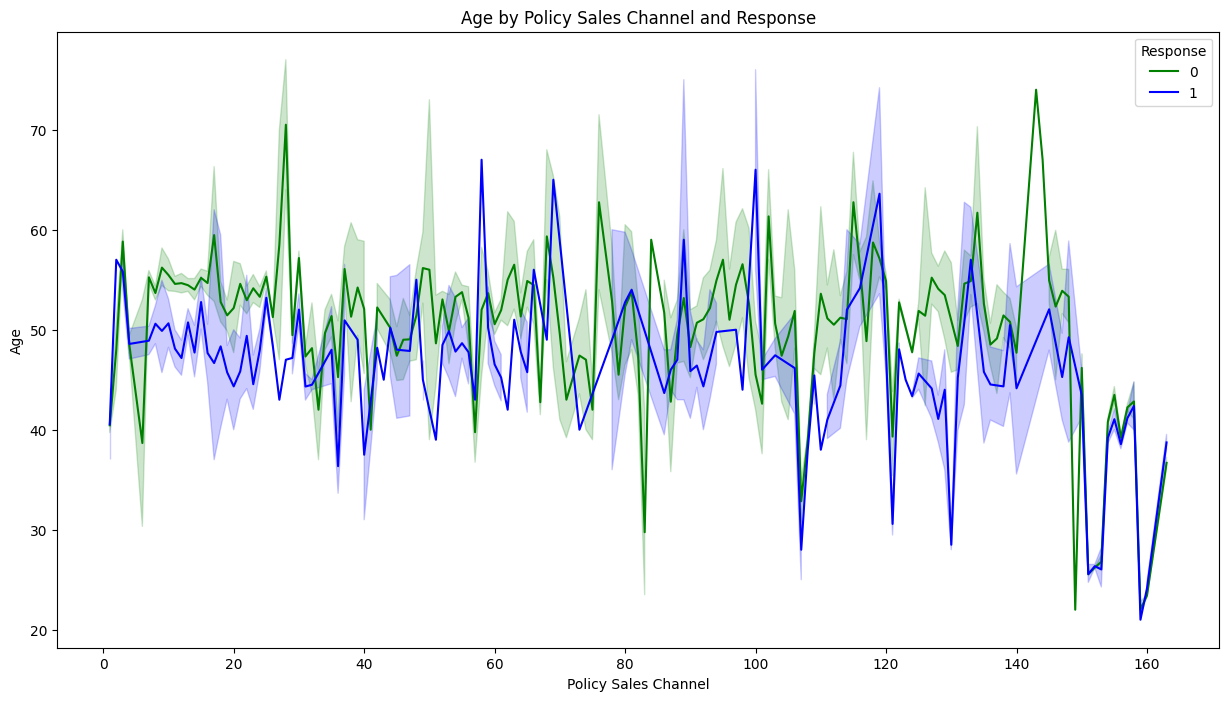

In [ ]:

# Plot the line plot of 'Age' vs. 'Policy_Sales_Channel' with hue for 'Response'
plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x='Policy_Sales_Channel', y='Age', hue='Response', palette=['g', 'b'])
plt.title('Age by Policy Sales Channel and Response')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Age')
plt.show()


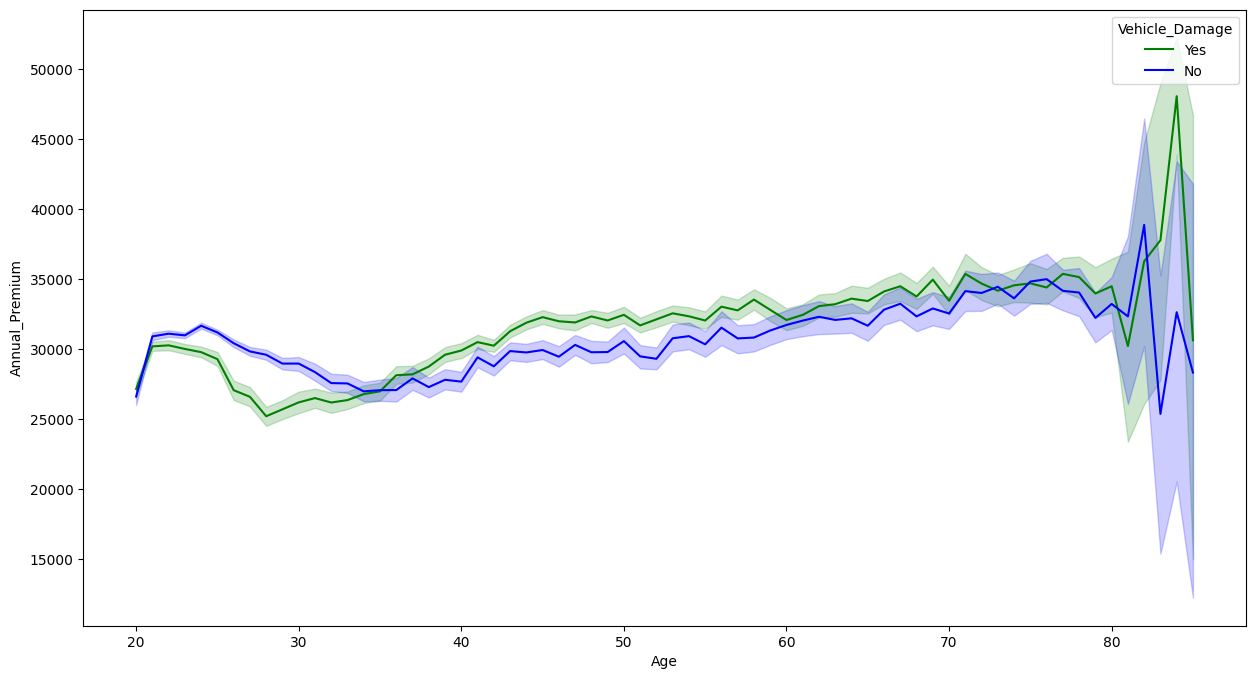

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x ='Age', y='Annual_Premium', hue='Vehicle_Damage', palette=['g', 'b'])
plt.show()

The lineplot shows that customers with vehicle damage are more likely to purchase insurance, as indicated by their higher trend in the plo

#### Chart - 14 - Correlation Heatmap

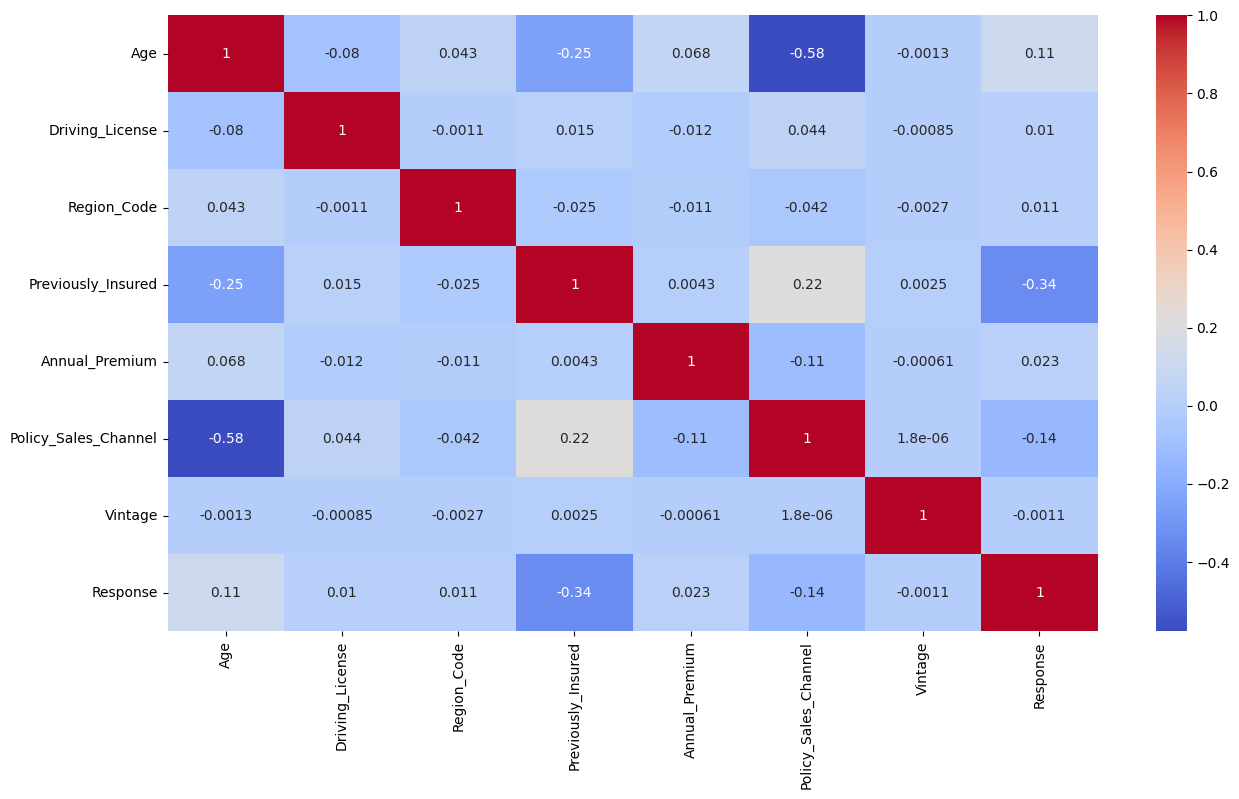

In [ ]:
# Correlation Heatmap visualization code
corr_df = df_int.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_df,cmap='coolwarm',annot=True)
plt.show()


A correlation heatmap matrix shows how features in a dataset relate to each other, indicating whether correlations are positive or negative. Previously_Insured correlates with the target variable and Policy_Sales_Channel. Age has a negative correlation with both Policy_Sales_Channel and Previously_Insured.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

I came up with the following hypothesis while thinking about the problem.
1. Gender: Male customers are more likely to buy health insurance than Female.

2. Age: It is generally said that it is profitable to buy Insurance as early as possible so more likely between Customers of ages of 25-40 are likely to buy Insurance.
3. Vehicle_Damage: Customers who have damaged vehicles don't want to get the health insurance.

3. Driving_License: Customers who generally have Driving_License take Insurance.

4. Previously_Insured: Customers generally take One Vehicle insurance.

5. Vehicle_Age: The more the age of the vehicle the better.

6. Annual_Premium: Customers generally opt for Insurance where the premium is not too high

### Hypothetical Statement - 1


Male customers are more likely to buy health insurance than female customers.

#### 2. Perform an appropriate statistical test.

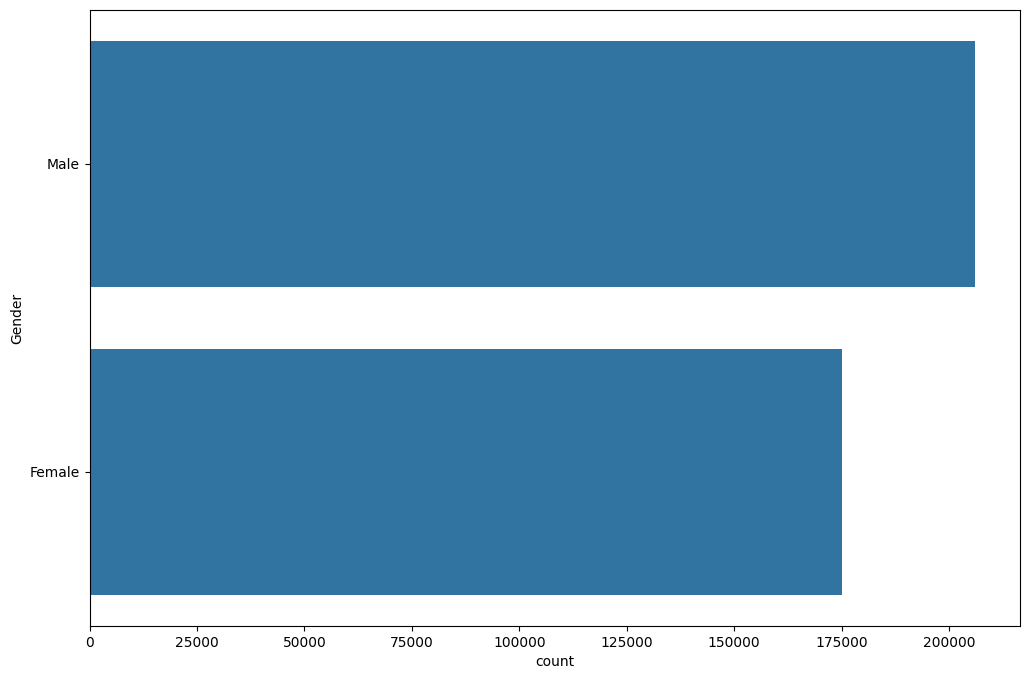

In [ ]:
# Perform Statistical Test to obtain P-Value
#H1 Male customers are more likely to health insurance than Female.
df_Response = df1[df1['Response'] == 'yes']
sns.countplot(y=df1['Gender'], data= df_Response)
plt.show()


From the above plot, we can confirm that our first hypothesis is true: male customers are more likely to purchase health insurance than female customers.

### Hypothetical Statement - 2


It is generally said that buying insurance early is more profitable. Therefore, customers aged 25-40 are more likely to purchase insurance.

#### 2. Perform an appropriate statistical test.

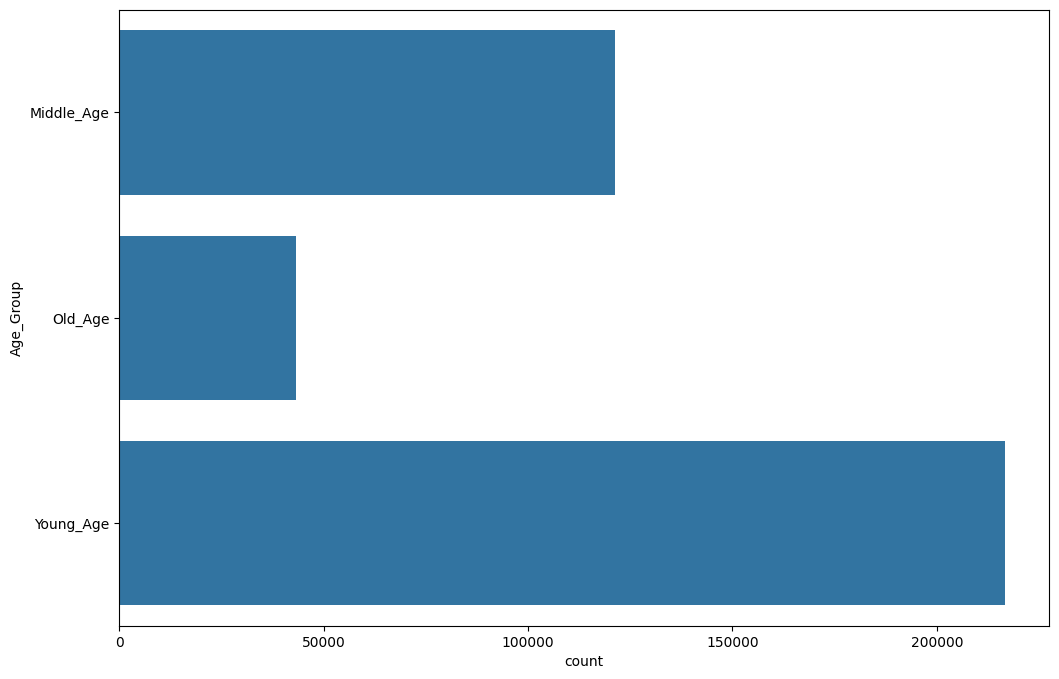

In [ ]:
# Perform Statistical Test to obtain P-Value
df_Age = df1[df1['Response'] == 'yes']
sns.countplot(y=df1['Age_Group'], data= df_Age)
plt.show()

Age_Group:
Young_Age - between 20 to 40,
Middle_Age - between 40 to 60,
Old_Age - above 60.

From above plot, We can confirm that our second Hypothesis is true.

### Hypothetical Statement - 3

Customers who have damaged vehicles don't want to get the health insurance.

#### 2. Perform an appropriate statistical test.

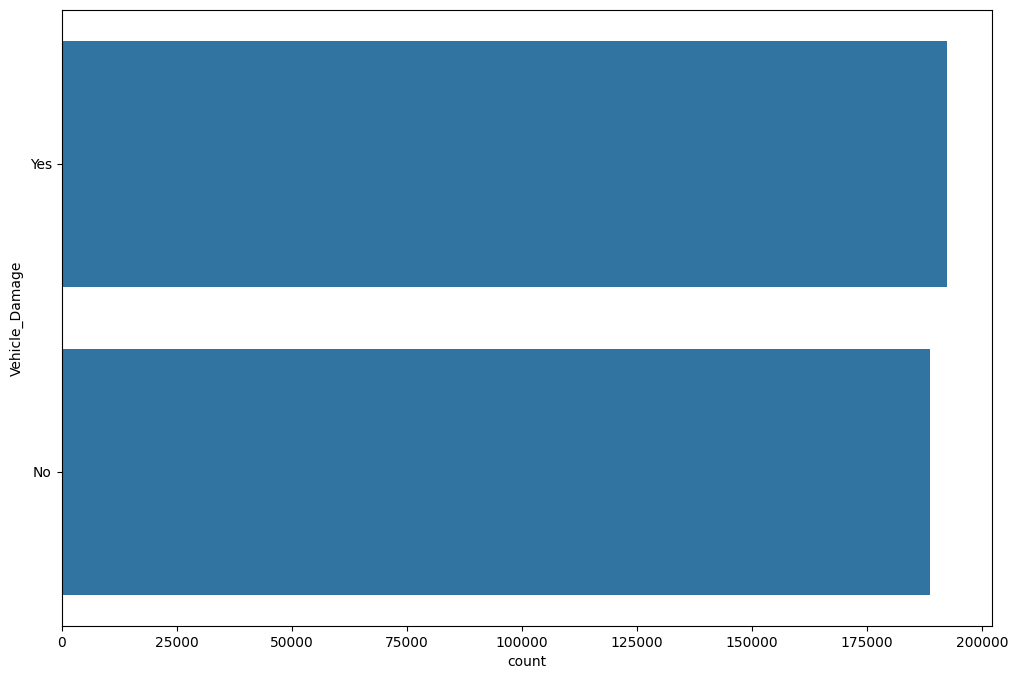

In [ ]:
# Perform Statistical Test to obtain P-Value
df_Vehicle_Damage = df1[df1['Response'] == 'yes']
sns.countplot(y=df1['Vehicle_Damage'], data= df_Vehicle_Damage)
plt.show()

From the above plot, we can confirm that our third hypothesis is false. Customers with damaged vehicles are more likely to want insurance than those without damaged vehicles.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


We used .isna() to check for missing values and .sum() to count them. There are zero missing values in the dataset.

### 2. Handling Outliers

In [ ]:
# Handling outliers in Annual_Premium
Q1=df['Annual_Premium'].quantile(0.25)
Q3=df['Annual_Premium'].quantile(0.75)
IQR=Q3-Q1

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Q1,',',Q3)
print(IQR)
print(Lower_Whisker,',',Upper_Whisker)

24405.0 , 39400.0
14995.0
1912.5 , 61892.5


In [ ]:
# Handling Outliers & Outlier treatments
def outlier_treatment(df):
    Q1=df['Annual_Premium'].quantile(0.25)
    Q3=df['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df['Annual_Premium'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

outlier_treatment(df)

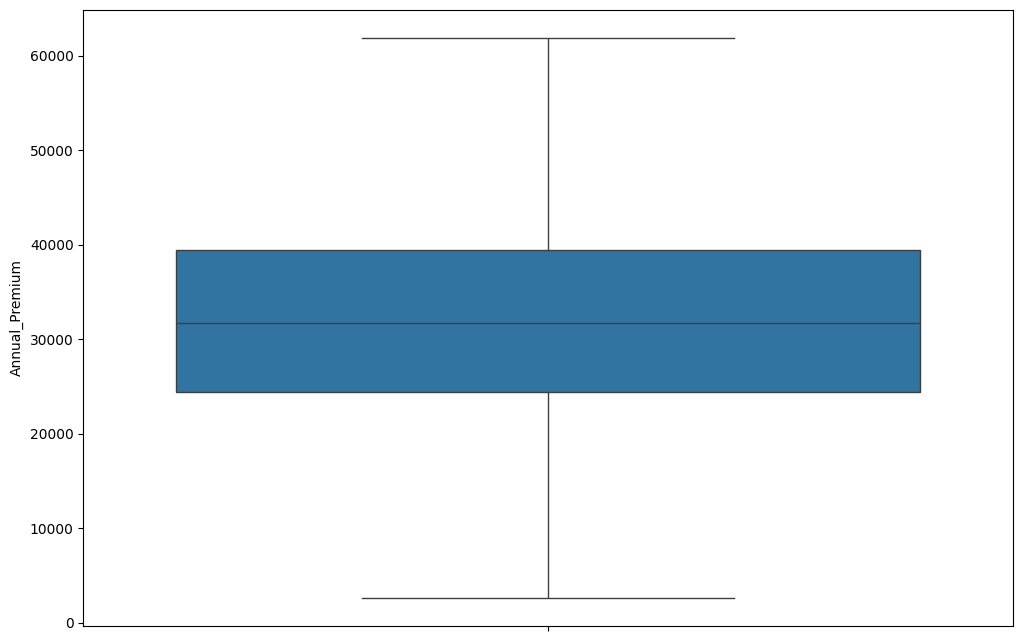

In [ ]:
sns.boxplot(df['Annual_Premium'])
plt.show()

In [ ]:
# Encode your categorical columns
#changing categorical value to numerical values
cols_to_encode = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
df = pd.get_dummies(data = df, columns=cols_to_encode)
df.head()

id  Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   1   44                1         28.0                   0         40454.0   
1   2   76                1          3.0                   0         33536.0   
2   3   47                1         28.0                   0         38294.0   
3   4   21                1         11.0                   1         28619.0   
4   5   29                1         41.0                   1         27496.0   

   Policy_Sales_Channel  Vintage  Response  Gender_Female  Gender_Male  \
0                  26.0      217         1          False         True   
1                  26.0      183         0          False         True   
2                  26.0       27         1          False         True   
3                 152.0      203         0          False         True   
4                 152.0       39         0           True        False   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  \
0                 False                 False                   True   
1                  True                 False                  False   
2                 False                 False                   True   
3                 False                  True                  False   
4                 False                  True                  False   

   Vehicle_Damage_No  Vehicle_Damage_Yes  
0              False                True  
1               True               False  
2              False                True  
3               True               False  
4               True               False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     381109 non-null  int64  
 1   Age                    381109 non-null  int64  
 2   Driving_License        381109 non-null  int64  
 3   Region_Code            381109 non-null  float64
 4   Previously_Insured     381109 non-null  int64  
 5   Annual_Premium         381109 non-null  float64
 6   Policy_Sales_Channel   381109 non-null  float64
 7   Vintage                381109 non-null  int64  
 8   Response               381109 non-null  int64  
 9   Gender_Female          381109 non-null  bool   
 10  Gender_Male            381109 non-null  bool   
 11  Vehicle_Age_1-2 Year   381109 non-null  bool   
 12  Vehicle_Age_< 1 Year   381109 non-null  bool   
 13  Vehicle_Age_> 2 Years  381109 non-null  bool   
 14  Vehicle_Damage_No      381109 non-nu

We used .get_dummies() to convert categorical object features into numerical integer features.

### Multicollinearity

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df_int.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
calc_vif(df_int[[i for i in df_int.describe().columns if i not in ['Response','id']]])

variables        VIF
0                   Age  10.452843
1       Driving_License  35.186725
2           Region_Code   4.954016
3    Previously_Insured   1.986280
4        Annual_Premium   4.174542
5  Policy_Sales_Channel   7.749016
6               Vintage   4.373156

In [ ]:
calc_vif(df_int[[i for i in df_int.describe().columns if i not in ['Response','id','Driving_License']]])

variables       VIF
0                   Age  5.048714
1           Region_Code  4.458503
2    Previously_Insured  1.921056
3        Annual_Premium  3.774268
4  Policy_Sales_Channel  4.054560
5               Vintage  4.011658

##### Multicollinearity between features.

There is high multicollinearity with the Driving_License feature, as indicated by its VIF. Therefore, we should remove Driving_License from our ML models.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

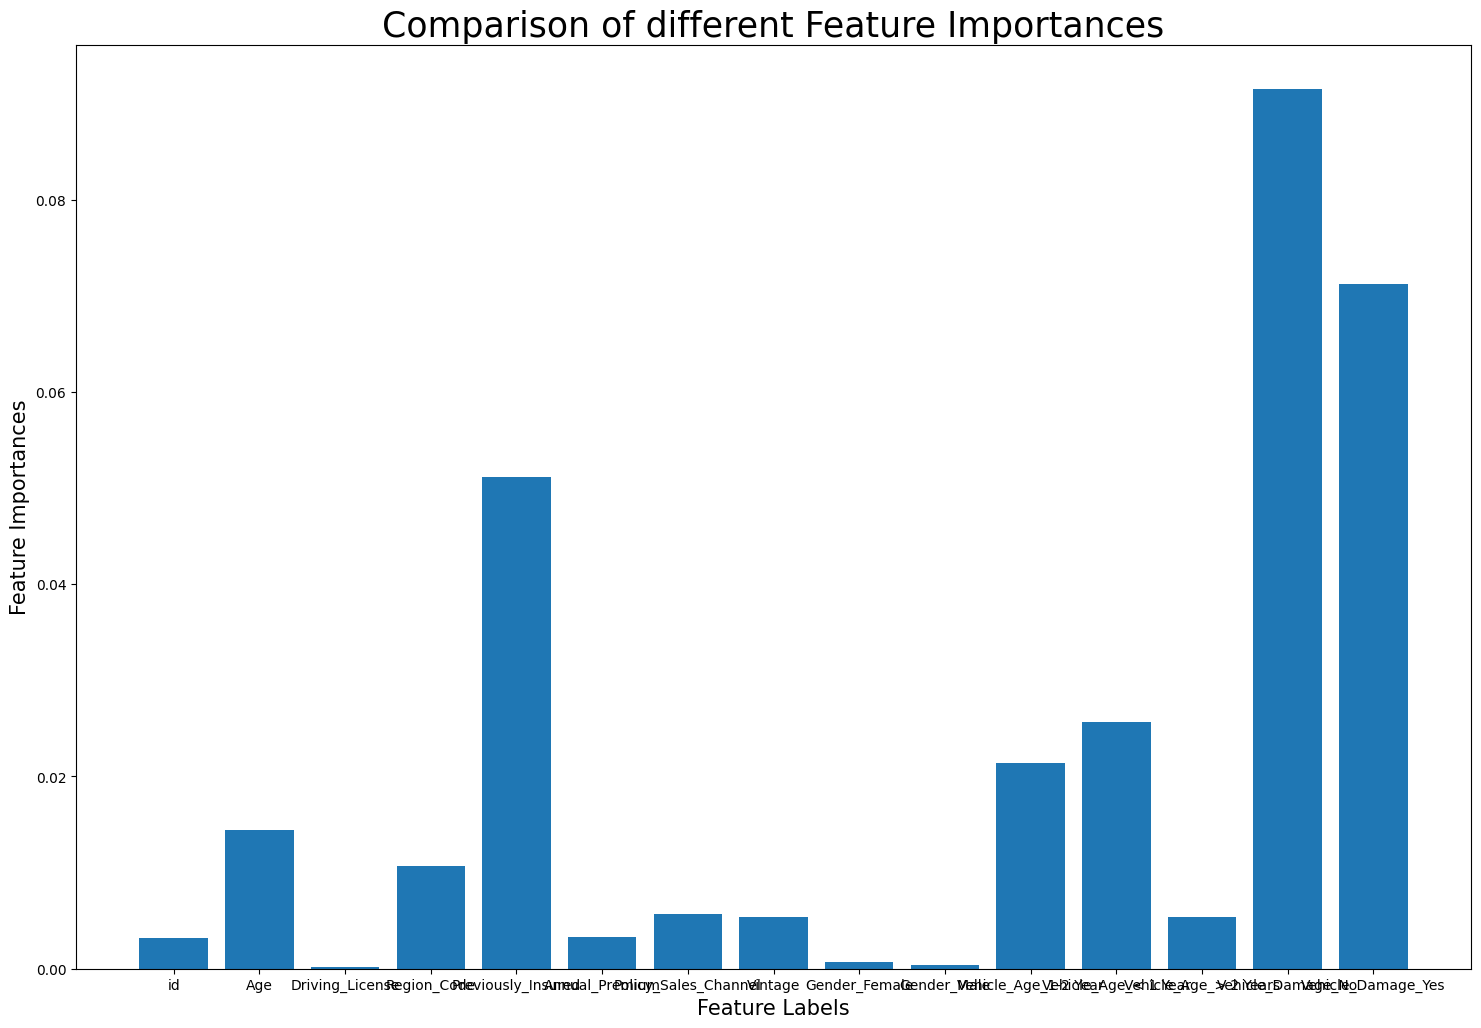

In [ ]:
# copying original dataset for comparsion
df_selection = df.copy()
x = df_selection.drop(columns = ['Response'])
y = df_selection.Response
# Building the model
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)
# Training the model
extra_tree_forest.fit(x, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std( [ tree.feature_importances_ for tree in extra_tree_forest.estimators_ ] , axis = 0)

# Plotting a Bar Graph to compare the models
plt.figure(figsize = (18,12))
plt.bar(x.columns, feature_importance_normalized)
plt.xlabel('Feature Labels' , fontsize = 15)
plt.ylabel('Feature Importances' , fontsize = 15)
plt.title('Comparison of different Feature Importances' , fontsize = 25)
plt.show()

In [ ]:
feat_importances_Series = pd.Series( feature_importance_normalized , index=x.columns)
print("Feature Name\t\t Importance")
print("-"*37 , end='\n')
feat_importances_Series.sort_values()

Feature Name		 Importance
-------------------------------------


Driving_License          0.000139
Gender_Male              0.000356
Gender_Female            0.000655
id                       0.003184
Annual_Premium           0.003338
Vehicle_Age_> 2 Years    0.005338
Vintage                  0.005396
Policy_Sales_Channel     0.005721
Region_Code              0.010699
Age                      0.014394
Vehicle_Age_1-2 Year     0.021446
Vehicle_Age_< 1 Year     0.025712
Previously_Insured       0.051190
Vehicle_Damage_Yes       0.071264
Vehicle_Damage_No        0.091584
dtype: float64

We can remove less important features from the data set like
Driving_License , Gender and id.

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# defining dependent variable
dep_var = 'Response'

# defining independent variable
indep_var = df.columns.drop(['Driving_License','id','Response','Gender_Female', 'Gender_Male'])

In [ ]:
df.columns.drop(['Driving_License','id','Response','Gender_Female', 'Gender_Male'])

Index(['Age', 'Region_Code', 'Previously_Insured', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes'],
      dtype='object')

#### 2. Feature Selection

In [ ]:
# Creating the data of independent variables
X = df[indep_var]

# Creating the dependent variable data
y = df[dep_var]

Multicollinearity and Feature Importance methods are used to select features for modeling.

Previously_Insured, Vehicle_Age, Vehicle_Damage are the important features as seen in feature importance above.

### 5. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(f'{X_train.shape}\t{X_test.shape}\t {y_train.shape}\t {y_test.shape}')

(304887, 11)	(76222, 11)	 (304887,)	 (76222,)


Splitting ratio is 20 test and 80 train.

### 6. Handling Imbalanced Dataset

In [ ]:
# Checking imbalance in our dependent feature
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

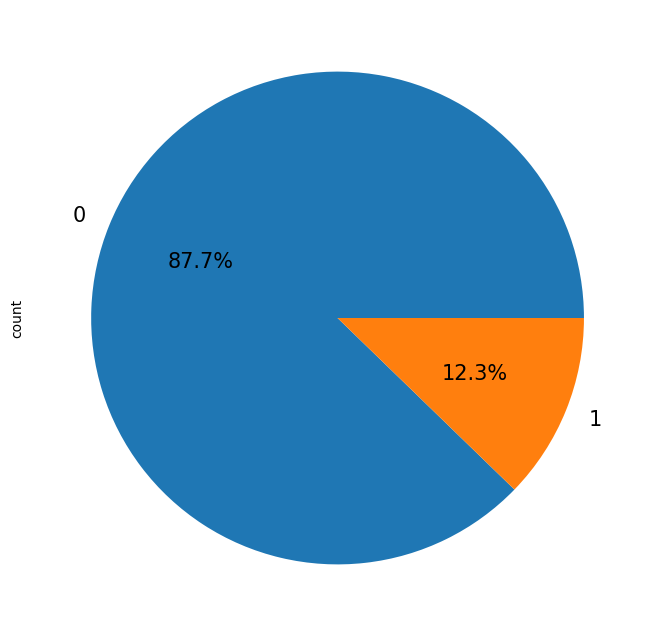

In [ ]:
# percentage of imbalance in 'Response'
percent = df['Response'].value_counts()
percent.plot.pie(fontsize= 15,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 12})
plt.show()


In the 'Response' feature, 0 represents 87.7% of the data, while 1 accounts for only 12.3%. The dataset is imbalanced and needs to be balanced.

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=5)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(X_ros))
print('Resampled dataset shape', len(y_ros))
print('Resampled dataset shape', len(X_train))
print('Resampled dataset shape', len(y_train))

Original dataset shape 381109
Resampled dataset shape 534694
Resampled dataset shape 534694
Resampled dataset shape 304887
Resampled dataset shape 304887


The dataset has now been balanced using the over_sampling SMOTE technique, and it is ready for training the model.

### 7. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ros = scaler.fit_transform(X_ros)
X_test = scaler.transform(X_test)

We applied Standardization (StandardScaler) to scale our data. This method transforms all features to have a mean (μ) of 0 and a standard deviation (σ) of 1, ensuring they follow a standard normal distribution.

## ***7. ML Model Implementation***

### ML Model - 1 **[** **LogisticRegression** **]**

In [ ]:
# ML Model - 1 Implementation(LogisticRegression)
model1 = LogisticRegression()
# Fit the Algorithm
model1 = model1.fit(X_ros,y_ros)
# Predict on the model
y_pred_train = model1.predict(X_ros)
y_pred_test = model1.predict(X_test)

In [ ]:
# Performance on train set
accuracy_score_train = accuracy_score(y_ros, y_pred_train)
precision_score_train = precision_score(y_ros, y_pred_train)
recall_score_train = recall_score(y_ros, y_pred_train)
f1_score_train = f1_score(y_ros, y_pred_train)
roc_auc_score_train = roc_auc_score(y_ros, y_pred_train)
print(accuracy_score_train,precision_score_train,recall_score_train,f1_score_train,roc_auc_score_train)

0.8265980168096144 0.7799024196340416 0.9100120816766225 0.8399485581612133 0.8265980168096144


In [ ]:
#Performance on test set
accuracy_score_test = accuracy_score(y_test, y_pred_test)
precision_score_test = precision_score(y_test, y_pred_test)
recall_score_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)
roc_auc_score_test = roc_auc_score(y_test, y_pred_test)
print(accuracy_score_test,precision_score_test,recall_score_test,f1_score_test,roc_auc_score_test)

0.7459394925349636 0.2886170433340245 0.7589967284623773 0.41820639927895453 0.7515752597749459


In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[49897 17155]
 [ 2210  6960]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Function for ploting confusion matrix
def plot_confusion_matrix(model, X_test, y_test, y_pred):
    label = ['1', '0']
    cm = confusion_matrix(y_test, y_pred_test)
    group_names = ['True positive','False Positive','False Negative','True Negative']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax= plt.subplot()
    sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
    ax.set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})
    ax.xaxis.set_ticklabels(label)
    ax.yaxis.set_ticklabels(label)
    plt.show()

# Function for ploting roc curve
def plot_roc_curve(model, X_test, y_test, y_pred):
    plt.figure(figsize = (12,5))
    pred_proba = model.predict_proba(X_test)
    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
    # roc curve for tpr = fpr
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)
    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    # title
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    # x label
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    # y label
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
    plt.legend(loc='best')
    plt.show()

# Function for Evaluation Metrics
def evaluation_metrics(model,y_test,y_pred):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)] #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)] #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)] #F1 Score
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)] #ROC AUC Score

    metrics_df = pd.DataFrame(metrics_dict)
    print(metrics_df)

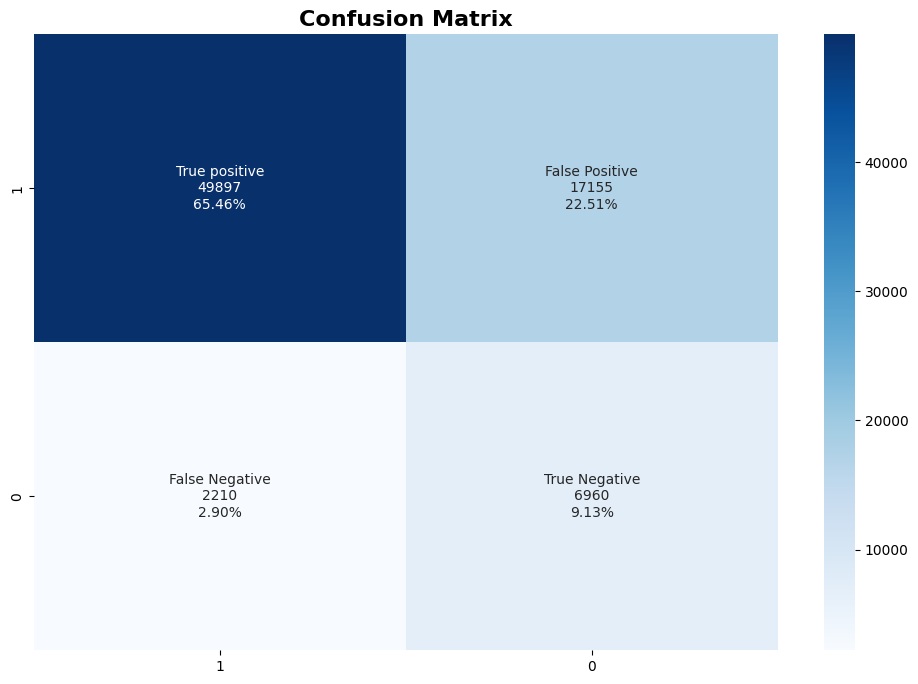

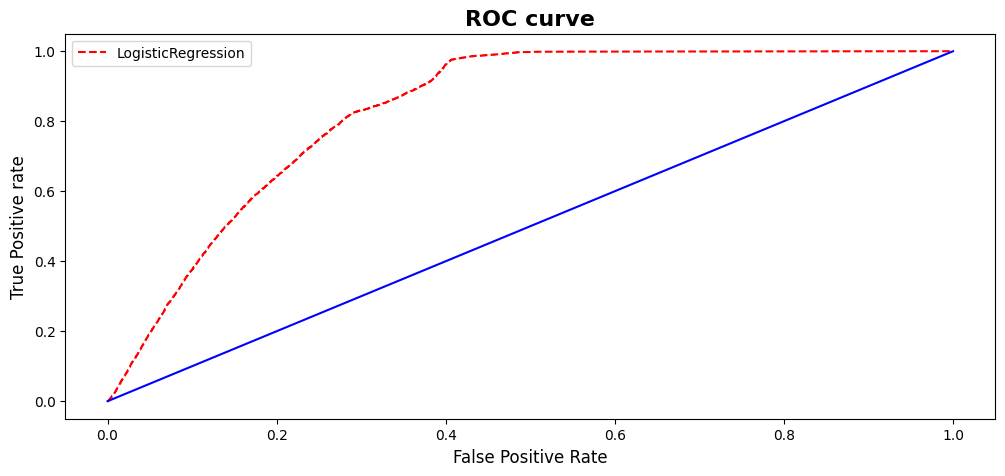

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model1, X_test, y_test, y_pred_test)
plot_roc_curve(model1, X_test, y_test, y_pred_test)

### ML Model - 2  **[** **DecisionTreeClassifier** **]**

In [ ]:
# ML Model - 2 Implementation(DecisionTreeClassifier)
model2 = DecisionTreeClassifier()
# Fit the Algorithm
model2 = model2.fit(X_ros,y_ros)
# Predict on the model
y_pred_train = model2.predict(X_ros)
y_pred_test = model2.predict(X_test)

In [ ]:
# Checking the Performance on train set
as_dt_train = accuracy_score(y_ros, y_pred_train)
ps_dt_train = precision_score(y_ros, y_pred_train)
rs_dt_train = recall_score(y_ros, y_pred_train)
f1s_dt_train = f1_score(y_ros, y_pred_train)
ras_dt_train = roc_auc_score(y_ros, y_pred_train)
print(as_dt_train, ps_dt_train, rs_dt_train,f1s_dt_train, ras_dt_train)

0.9995399237694831 0.9997380641443491 0.9993416795400734 0.9995398325439403 0.9995399237694831


In [ ]:
# Checking the Performance on test set
as_dt_test = accuracy_score(y_test, y_pred_test)
ps_dt_test = precision_score(y_test, y_pred_test)
rs_dt_test = recall_score(y_test, y_pred_test)
f1s_dt_test = f1_score(y_test, y_pred_test)
ras_dt_test = roc_auc_score(y_test, y_pred_test)
print(as_dt_test,ps_dt_test,rs_dt_test,f1s_dt_test, ras_dt_test)

0.8179397024481121 0.28266691291901375 0.3338058887677208 0.3061153057652882 0.608977751995863


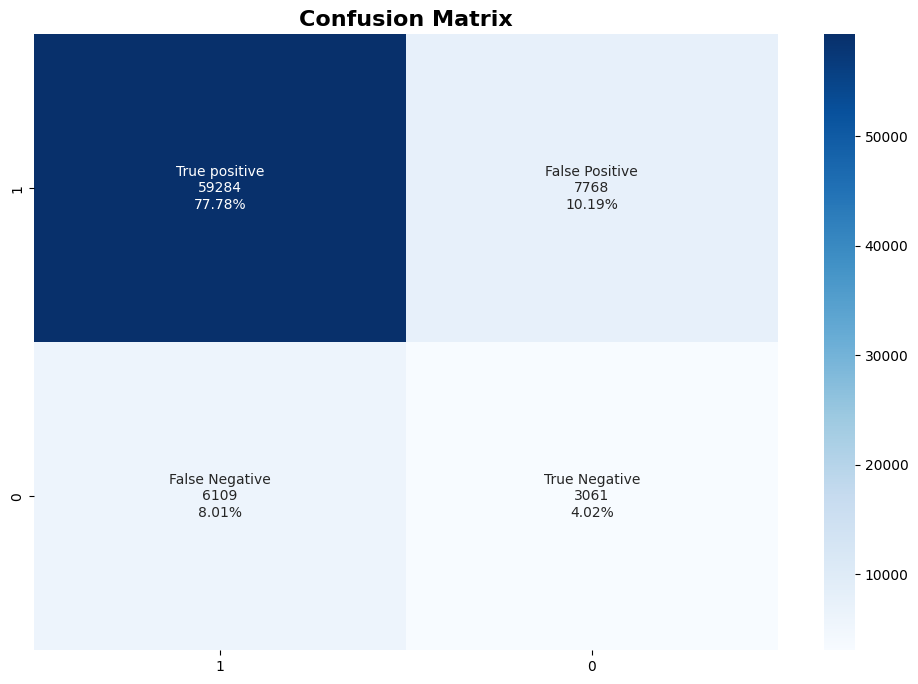

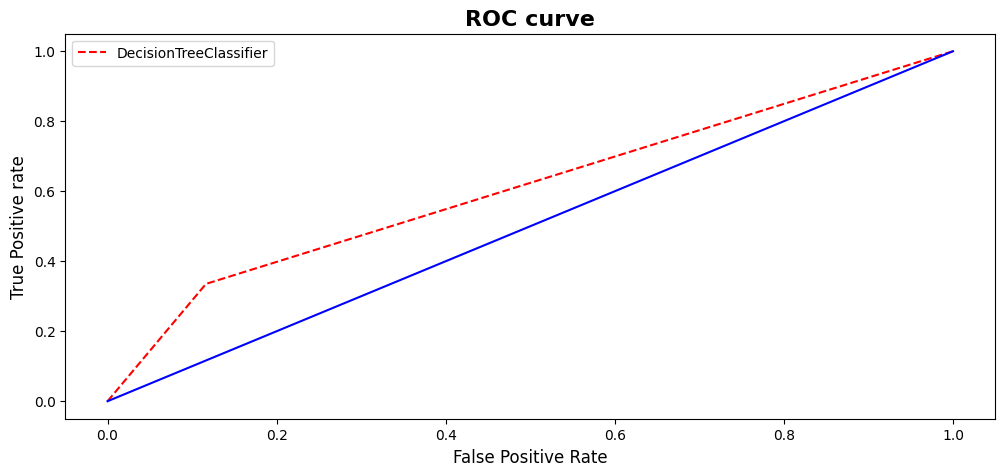

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model2, X_test, y_test, y_pred_test)
plot_roc_curve(model2, X_test, y_test, y_pred_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model2_classifier = DecisionTreeClassifier()
parameters_decision_tree = {"max_depth" : [5,7,9],"min_samples_leaf":[1,3,5],"min_weight_fraction_leaf":[0.0,0.3,0.4,0.5],"max_leaf_nodes":[20,40,60],'random_state':[24]}
model2_classifier_CV = GridSearchCV(model2_classifier,param_grid = parameters_decision_tree,cv =3, scoring = 'accuracy')
# Fit the Algorithm
model2_classifier.fit(X_ros, y_ros)
# Predict on the model
y_pred_train =  model2_classifier.predict(X_ros)
y_pred_test  = model2_classifier.predict(X_test)

In [ ]:
# Function for Evaluation Metrics
def evaluation_metrics(model,y_test,y_pred):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)] #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)] #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)] #F1 Score
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)] #ROC AUC Score

    metrics_df = pd.DataFrame(metrics_dict)
    print(metrics_df)

In [ ]:
# evaluation Metric Score
evaluation_metrics(model2_classifier_CV,y_test,y_pred_test)

   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score
0        0.818005   0.282476  0.332933  0.305636       0.608638


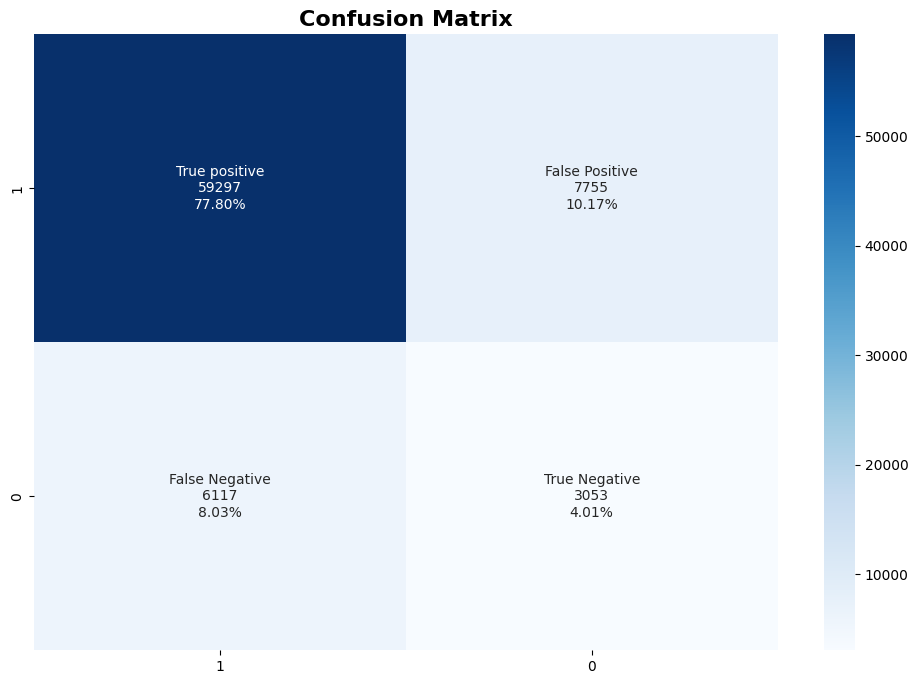

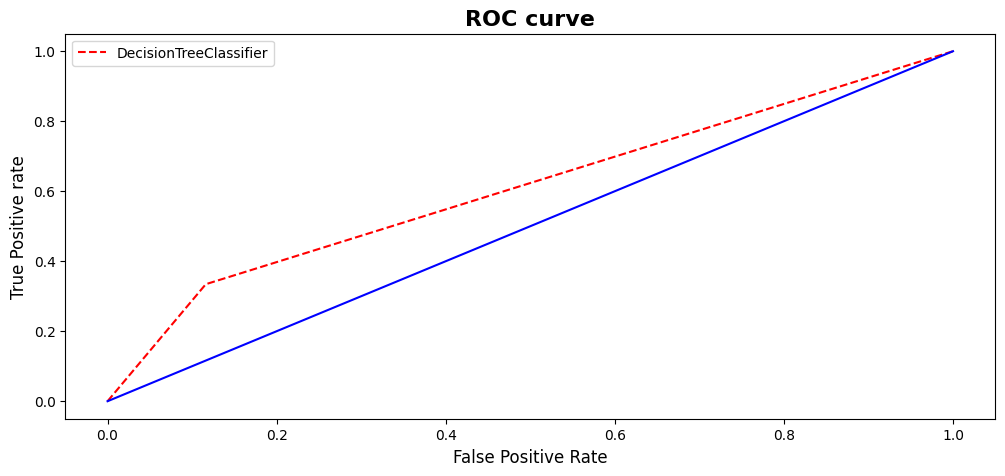

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(model2_classifier, X_test, y_test, y_pred_test)
plot_roc_curve(model2_classifier, X_test, y_test, y_pred_test)

Used GridSearchCV technique for hyperparameter optimization and accuracy for scoring.  

# **Conclusion**

## Conclusion
After checking for null values and duplicates in the dataset (none found), we applied feature scaling to normalize the data for better machine learning performance.

## Exploratory Data Analysis revealed that:

Customers aged between 30 and 60 are more likely to buy insurance.
Customers with vehicles older than 2 years and those with vehicle damage show higher interest in vehicle insurance.
Customers with a driving license are more likely to purchase insurance.
For feature selection, Previously_Insured was identified as the most important feature impacting the target variable. We also found no strong correlation among numeric features.

We implemented and tuned various machine learning algorithms, including Decision Tree Classifier and Logistic Regression:

Decision Tree Classifier: Effective for capturing complex decision boundaries and interactions between features.
Logistic Regression: Useful for providing clear probability-based predictions on insurance purchases.
The Decision Tree Classifier and Logistic Regression models performed well. Given the dataset imbalance, we focused on precision, recall, and ROC-AUC scores in addition to accuracy.